# <p style="font-family:newtimeroman;color:#182F2F;font-size:200%;text-align:center;border-radius:10px 10px;">CUSTOMER ANALYSIS</p>

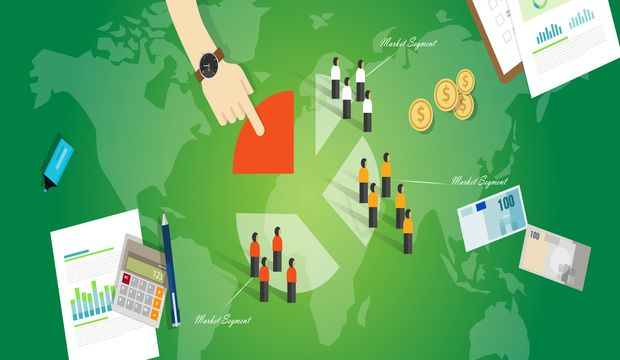




## PROBLEM STATEMENT
A well known company with numerous products needs to analyze their customer behavior and
classify them whether they will accept the campaigns held by the company. Also, cluster the
customers into different segments.

## GOALS


The objective of this exercise is to build a model, using historical data Focus on all steps of data
science (EDA, data processing, model, evaluation, charts)
1. Highlight any trend in data, deep insight, novel steps that you take
2. Highlight next steps and improvements.
3. Apply classification and clustering machine learning algorithms and evaluate it.

###  Data Dictionary

#### People

● ID: Customer's unique identifier.

● Year_Birth: Customer's birth year.

● Education: Customer's education level.

● Marital_Status: Customer's marital status.

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise


#### Products

● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years


#### Promotion

● NumDealsPurchases: Number of purchases made with a discount
    
● AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    
● AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    
● AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    
● AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    
● AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    
● Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    


#### Place

● NumWebPurchases: Number of purchases made through the company’s website
    
● NumCatalogPurchases: Number of purchases made using a catalogue
    
● NumStorePurchases: Number of purchases made directly in stores
    
● NumWebVisitsMonth: Number of visits to company’s website in the last month
    

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">1.Importing Libraries</p>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">2.Loading Dataset</p>

In [3]:
#Load training dataset
df_train=pd.read_csv("C:\\Users\\hp\\Downloads\\customer_train.csv")
df_train.head()

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status   
0             0           0  5524        1957        S1         Lajang  \
1             1           1  2174        1954        S1         Lajang   
2             2           2  4141        1965        S1    Bertunangan   
3             3           3  6182        1984        S1    Bertunangan   
4             4           4  5324        1981        S3        Menikah   

       Income  Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits   
0  58138000.0        0         0  04-09-2012       58   635000      88000  \
1  46344000.0        1         1  08-03-2014       38    11000       1000   
2  71613000.0        0         0  21-08-2013       26   426000      49000   
3  26646000.0        1         0  10-02-2014       26    11000       4000   
4  58293000.0        1         0  19-01-2014       94   173000      43000   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds   
0           546000           172000             88000         88000  \
1             6000             2000              1000          6000   
2           127000           111000             21000         42000   
3            20000            10000              3000          5000   
4           118000            46000             27000         15000   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases   
0                  3                8                   10                  4  \
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1   
0                  7             0             0             0             0  \
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         1  
1             0         0              3         11         0  
2             0         0              3         11         0  
3             0         0              3         11         0  
4             0         0              3         11         0

In [4]:
#Load testing dataset
df_test=pd.read_csv("C:\\Users\\hp\\Downloads\\customer_test.csv")
df_test.head()

Unnamed: 0.1  Unnamed: 0     ID  Year_Birth Education Marital_Status   
0          1681        1681   5939        1971        S1    Bertunangan  \
1          1682        1682   2156        1955        S3        Menikah   
2          1683        1683   7788        1983        S3        Menikah   
3          1684        1684  10323        1952        S1        Menikah   
4          1685        1685   7947        1969        S1        Menikah   

       Income  Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits   
0  38232000.0        1         1  17-01-2014       84    43000       5000  \
1  22554000.0        1         1  03-11-2012       38    27000          0   
2  23536000.0        1         0  04-06-2014       53     6000          0   
3  49413000.0        0         1  25-10-2013       88   205000       7000   
4  42231000.0        1         1  25-03-2014       99    24000          0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds   
0            28000             7000              6000         33000  \
1            10000                0                 0          4000   
2             3000                0                 0          1000   
3            41000             3000              2000         46000   
4             8000                0              1000          4000   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases   
0                  4                3                    1                  3  \
1                  4                2                    0                  4   
2                  1                0                    0                  3   
3                  2                4                    2                  5   
4                  1                1                    0                  3   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1   
0                  5             0             0             0             0  \
1                  5             0             0             0             0   
2                  3             0             0             0             0   
3                  5             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         0  
1             0         0              3         11         0  
2             0         0              3         11         0  
3             0         0              3         11         0  
4             0         0              3         11         0

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">3.Exploring Dataset</p>

In [5]:
#dropping the repeated columns from both train and test dataset
df_train.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [6]:
df_train.head(2)

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome   
0  5524        1957        S1         Lajang  58138000.0        0         0  \
1  2174        1954        S1         Lajang  46344000.0        1         1   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0  04-09-2012       58   635000      88000           546000           172000  \
1  08-03-2014       38    11000       1000             6000             2000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             88000         88000                  3                8  \
1              1000          6000                  2                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3   
0                   10                  4                  7             0  \
1                    1                  2                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain   
0             0             0             0             0         0  \
1             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0

In [7]:
df_test.head(2)

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome   
0  5939        1971        S1    Bertunangan  38232000.0        1         1  \
1  2156        1955        S3        Menikah  22554000.0        1         1   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0  17-01-2014       84    43000       5000            28000             7000  \
1  03-11-2012       38    27000          0            10000                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0              6000         33000                  4                3  \
1                 0          4000                  4                2   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3   
0                    1                  3                  5             0  \
1                    0                  4                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain   
0             0             0             0             0         0  \
1             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         0  
1              3         11         0

In [8]:
print('df_train shape:',df_train.shape)
print('df_test shape:',df_test.shape)

df_train shape: (1680, 29)
df_test shape: (559, 29)


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   559 non-null    int64  
 1   Year_Birth           559 non-null    int64  
 2   Education            559 non-null    object 
 3   Marital_Status       559 non-null    object 
 4   Income               552 non-null    float64
 5   Kidhome              559 non-null    int64  
 6   Teenhome             559 non-null    int64  
 7   Dt_Customer          559 non-null    object 
 8   Recency              559 non-null    int64  
 9   MntCoke              559 non-null    int64  
 10  MntFruits            559 non-null    int64  
 11  MntMeatProducts      559 non-null    int64  
 12  MntFishProducts      559 non-null    int64  
 13  MntSweetProducts     559 non-null    int64  
 14  MntGoldProds         559 non-null    int64  
 15  NumDealsPurchases    559 non-null    int

In [11]:
df_train.describe()

ID   Year_Birth        Income      Kidhome     Teenhome   
count   1680.000000  1680.000000  1.663000e+03  1680.000000  1680.000000  \
mean    5551.728571  1968.847619  5.201434e+07     0.452381     0.500000   
std     3238.155703    12.027192  2.148248e+07     0.546901     0.550055   
min        0.000000  1893.000000  1.730000e+06     0.000000     0.000000   
25%     2823.250000  1960.000000  3.568800e+07     0.000000     0.000000   
50%     5381.000000  1970.000000  5.125000e+07     0.000000     0.000000   
75%     8370.750000  1977.000000  6.812200e+07     1.000000     1.000000   
max    11191.000000  1996.000000  1.623970e+08     2.000000     2.000000   

           Recency       MntCoke      MntFruits  MntMeatProducts   
count  1680.000000  1.680000e+03    1680.000000     1.680000e+03  \
mean     49.083333  3.048994e+05   25918.452381     1.657738e+05   
std      28.930637  3.387051e+05   39532.059109     2.242424e+05   
min       0.000000  0.000000e+00       0.000000     1.000000e+03   
25%      24.000000  2.400000e+04    1000.000000     1.600000e+04   
50%      50.000000  1.730000e+05    8000.000000     6.800000e+04   
75%      74.000000  4.942500e+05   32000.000000     2.322500e+05   
max      99.000000  1.492000e+06  199000.000000     1.725000e+06   

       MntFishProducts  MntSweetProducts   MntGoldProds  NumDealsPurchases   
count      1680.000000       1680.000000    1680.000000        1680.000000  \
mean      36954.761905      27016.666667   43339.880952           2.338690   
std       54165.456719      41529.595304   51363.336472           1.966104   
min           0.000000          0.000000       0.000000           0.000000   
25%        3000.000000       1000.000000    9000.000000           1.000000   
50%       12000.000000       8000.000000   24000.000000           2.000000   
75%       48000.000000      32000.000000   54250.000000           3.000000   
max      259000.000000     263000.000000  362000.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases   
count      1680.000000          1680.000000        1680.000000  \
mean          4.041071             2.670833           5.789286   
std           2.673427             2.972874           3.245504   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5   
count        1680.000000   1680.000000   1680.000000   1680.000000  \
mean            5.332143      0.071429      0.074405      0.069048   
std             2.449814      0.257616      0.262507      0.253611   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue   
count   1680.000000   1680.000000  1680.000000         1680.0     1680.0  \
mean       0.062500      0.011905     0.010119            3.0       11.0   
std        0.242134      0.108490     0.100113            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  1680.000000  
mean      0.144048  
std       0.351243  
min       0.000000  


In [12]:
df_test.describe()

ID   Year_Birth        Income     Kidhome    Teenhome   
count    559.000000   559.000000  5.520000e+02  559.000000  559.000000  \
mean    5721.500894  1968.663685  5.291597e+07    0.420394    0.525939   
std     3269.336755    11.867607  3.397271e+07    0.511880    0.527682   
min       17.000000  1940.000000  4.023000e+06    0.000000    0.000000   
25%     2850.500000  1958.500000  3.423900e+07    0.000000    0.000000   
50%     5631.000000  1970.000000  5.246300e+07    0.000000    1.000000   
75%     8603.500000  1977.000000  6.956550e+07    1.000000    1.000000   
max    11187.000000  1995.000000  6.666660e+08    2.000000    2.000000   

          Recency       MntCoke      MntFruits  MntMeatProducts   
count  559.000000  5.590000e+02     559.000000     5.590000e+02  \
mean    49.187835  3.003488e+05   27293.381038     1.698909e+05   
std     29.109522  3.303610e+05   40361.180414     2.300301e+05   
min      0.000000  0.000000e+00       0.000000     0.000000e+00   
25%     25.000000  2.300000e+04    2000.000000     1.500000e+04   
50%     49.000000  1.750000e+05    8000.000000     6.400000e+04   
75%     74.000000  5.140000e+05   35000.000000     2.245000e+05   
max     99.000000  1.493000e+06  194000.000000     1.607000e+06   

       MntFishProducts  MntSweetProducts   MntGoldProds  NumDealsPurchases   
count       559.000000        559.000000     559.000000         559.000000  \
mean      39171.735242      27067.978533   45992.844365           2.286225   
std       56039.372894      40472.819695   54524.598562           1.828784   
min           0.000000          0.000000       0.000000           0.000000   
25%        3000.000000       2000.000000    9000.000000           1.000000   
50%       12000.000000       8000.000000   25000.000000           2.000000   
75%       55000.000000      37500.000000   58500.000000           3.000000   
max      258000.000000     262000.000000  321000.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases   
count       559.000000            559.00000         559.000000  \
mean          4.214669              2.62254           5.790698   
std           3.074417              2.75569           3.272704   
min           0.000000              0.00000           0.000000   
25%           2.000000              0.00000           3.000000   
50%           4.000000              2.00000           5.000000   
75%           6.000000              4.00000           8.000000   
max          27.000000             11.00000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5   
count         559.000000    559.000000    559.000000    559.000000  \
mean            5.273703      0.076923      0.075134      0.084079   
std             2.357450      0.266708      0.263844      0.277754   
min             0.000000      0.000000      0.000000      0.000000   
25%             4.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            19.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2    Complain  Z_CostContact  Z_Revenue   
count    559.000000    559.000000  559.000000          559.0      559.0  \
mean       0.067979      0.017889    0.007156            3.0       11.0   
std        0.251935      0.132667    0.084363            0.0        0.0   
min        0.000000      0.000000    0.000000            3.0       11.0   
25%        0.000000      0.000000    0.000000            3.0       11.0   
50%        0.000000      0.000000    0.000000            3.0       11.0   
75%        0.000000      0.000000    0.000000            3.0       11.0   
max        1.000000      1.000000    1.000000            3.0       11.0   

         Response  
count  559.000000  
mean     0.164580  
std      0.371133  
min      0.000000  
25%      0.000000  
50%      0.000000  
7

In [13]:
df_train.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [14]:
df_test.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 7
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [15]:
df_train=df_train.dropna()
df_train.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
df_test=df_test.dropna()
df_test.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [17]:
df_train.nunique()

ID                     1663
Year_Birth               58
Education                 5
Marital_Status            6
Income                 1512
Kidhome                   3
Teenhome                  3
Dt_Customer             619
Recency                 100
MntCoke                 679
MntFruits               151
MntMeatProducts         482
MntFishProducts         171
MntSweetProducts        166
MntGoldProds            194
NumDealsPurchases        15
NumWebPurchases          12
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        15
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [18]:
df_test.nunique()

ID                     552
Year_Birth              52
Education                5
Marital_Status           5
Income                 539
Kidhome                  3
Teenhome                 3
Dt_Customer            376
Recency                 99
MntCoke                342
MntFruits              114
MntMeatProducts        271
MntFishProducts        130
MntSweetProducts       112
MntGoldProds           143
NumDealsPurchases       14
NumWebPurchases         15
NumCatalogPurchases     12
NumStorePurchases       14
NumWebVisitsMonth       13
AcceptedCmp3             2
AcceptedCmp4             2
AcceptedCmp5             2
AcceptedCmp1             2
AcceptedCmp2             2
Complain                 2
Z_CostContact            1
Z_Revenue                1
Response                 2
dtype: int64

#### Checking on Z_CostContact & Z_Revenue as they seem to have a single value

In [19]:
print(df_train.Z_CostContact.unique())
print(df_test.Z_CostContact.unique())


[3]
[3]


In [20]:
print(df_train.Z_Revenue.unique())
print(df_test.Z_Revenue.unique())

[11]
[11]


#### Since they have single values of 3 & 11 it will not contribute much to the model creation.So they are dropped from both training and testing dataset.

In [21]:
df_train.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)
df_test.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [22]:
print('df_train.shape',df_train.shape)
print('df_test.shape',df_test.shape)

df_train.shape (1663, 27)
df_test.shape (552, 27)


# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">4.Feature Engineering</p>

In [23]:
#studying the feature 'Dt_Customer'
df_train.Dt_Customer

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
1675    28-11-2012
1676    25-03-2013
1677    27-06-2013
1678    12-02-2013
1679    23-01-2014
Name: Dt_Customer, Length: 1663, dtype: object

In [24]:
#Changing datatype for both train and test data

df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'],format='mixed')
print(df_train['Dt_Customer'].max())


df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'],format='mixed')
print(df_test['Dt_Customer'].max())


2014-12-05 00:00:00
2014-12-06 00:00:00


In [25]:
#for train dataset
dates = []
for i in df_train['Dt_Customer']:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print('The newest customer enrolment date:',max(dates))
print('The oldest customer enrolment date:',min(dates))

The newest customer enrolment date: 2014-12-05
The oldest customer enrolment date: 2012-01-08


In [26]:
#for test dataset
dates_test = []
for i in df_test['Dt_Customer']:
    i = i.date()
    dates_test.append(i)
#Dates of the newest and oldest recorded customer
print('The newest customer enrolment date:',max(dates_test))
print('The oldest customer enrolment date:',min(dates_test))

The newest customer enrolment date: 2014-12-06
The oldest customer enrolment date: 2012-01-08


In [27]:
#Creating a feature 'Customer_For'
days = []
d1=max(dates)
for i in dates:
    delta=d1 - i
    days.append(delta)
df_train['Customer_For'] = days
df_train['Customer_For'] = pd.to_numeric(df_train['Customer_For'],errors='coerce')


In [28]:
df_train.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome   
0  5524        1957        S1         Lajang  58138000.0        0         0  \
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0  2012-04-09       58   635000      88000           546000           172000  \
1  2014-08-03       38    11000       1000             6000             2000   
2  2013-08-21       26   426000      49000           127000           111000   
3  2014-10-02       26    11000       4000            20000            10000   
4  2014-01-19       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             88000         88000                  3                8  \
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3   
0                   10                  4                  7             0  \
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response   
0             0             0             0             0         0         1  \
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

        Customer_For  
0  83808000000000000  
1  10713600000000000  
2  40694400000000000  
3   5529600000000000  
4  27648000000000000

In [29]:
#Creating a feature 'Customer_For' testing data
days_test = []
d1_test=max(dates_test)
for i in dates_test:
    delta_test=d1_test - i
    days_test.append(delta_test)
df_test['Customer_For'] = days_test
df_test['Customer_For'] = pd.to_numeric(df_test['Customer_For'],errors='coerce')


In [30]:
df_test.head()

ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome   
0   5939        1971        S1    Bertunangan  38232000.0        1         1  \
1   2156        1955        S3        Menikah  22554000.0        1         1   
2   7788        1983        S3        Menikah  23536000.0        1         0   
3  10323        1952        S1        Menikah  49413000.0        0         1   
4   7947        1969        S1        Menikah  42231000.0        1         1   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0  2014-01-17       84    43000       5000            28000             7000  \
1  2012-03-11       38    27000          0            10000                0   
2  2014-04-06       53     6000          0             3000                0   
3  2013-10-25       88   205000       7000            41000             3000   
4  2014-03-25       99    24000          0             8000                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0              6000         33000                  4                3  \
1                 0          4000                  4                2   
2                 0          1000                  1                0   
3              2000         46000                  2                4   
4              1000          4000                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3   
0                    1                  3                  5             0  \
1                    0                  4                  5             0   
2                    0                  3                  3             0   
3                    2                  5                  5             0   
4                    0                  3                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response   
0             0             0             0             0         0         0  \
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

        Customer_For  
0  27907200000000000  
1  86400000000000000  
2  21081600000000000  
3  35164800000000000  
4  22118400000000000

#### This dataset contains the data of customers between 2012 & 2014.

In [31]:
#Creating Age Column
df_train['Age']=2023-df_train.Year_Birth

#Total spending on various products
df_train['Spent']=df_train['MntCoke']+df_train['MntFruits']+df_train['MntMeatProducts']+df_train['MntFishProducts']+df_train['MntSweetProducts']+df_train['MntGoldProds']
                    


#Changing the Indonesian words to English
df_train['Marital_Status']=df_train['Marital_Status'].replace({'Lajang':'Bachelor',
                                                              'Bertunangan':'Engaged',
                                                              'Menikah':'Married',
                                                              'Cerai':'Divorced',
                                                              'Janda':'Widow',
                                                              'Duda':'Widower'})



#Alone or Together
df_train['Living_With']=df_train['Marital_Status'].replace({'Bachelor':'Alone',
                                                            'Engaged':'Partner',
                                                            'Married':'Partner',
                                                            'Divorced':'Alone',
                                                            'Widow':'Alone',
                                                            'Widower':'Alone'})

#Total Children in the house
df_train['Children']=df_train['Kidhome']+df_train['Teenhome']

#Total members in the house
df_train['Family_Size']=df_train['Living_With'].replace({'Alone':1,'Partner':2}) + df_train['Children']


#Column showing parent or not
df_train['Is_Parent']=np.where(df_train.Children> 0, 1 , 0)

#Changing the Indonesian representations to English
df_train['Education']=df_train['Education'].replace({'S1':'Bachelors',
                                                     'S2':'Masters',
                                                     'S3':'Doctorate',
                                                     'SMA':'Senior High',
                                                     'D3':'Diploma'})



#Segmenting education levels in three groups
df_train['Education_Levels']=df_train['Education'].replace({'Bachelors':'Graduates',
                                                            'Masters':'PG',
                                                            'Doctorate':'PG',
                                                            'Senior High':'UG',
                                                            'Diploma':'UG'})



In [32]:
#Repeating the same for test dataset

#Creating Age Column
df_test['Age']=2023-df_test.Year_Birth


#Total spending on various products
df_test['Spent']=df_test['MntCoke']+df_test['MntFruits']+df_test['MntMeatProducts']+df_test['MntFishProducts']+df_test['MntSweetProducts']+df_test['MntGoldProds']
                    


#Changing the Indonesian words to English
df_test['Marital_Status']=df_test['Marital_Status'].replace({'Lajang':'Bachelor',
                                                              'Bertunangan':'Engaged',
                                                              'Menikah':'Married',
                                                              'Cerai':'Divorced',
                                                              'Janda':'Widow',
                                                              'Duda':'Widower'})



#Alone or Together
df_test['Living_With']=df_test['Marital_Status'].replace({'Bachelor':'Alone',
                                                            'Engaged':'Partner',
                                                            'Married':'Partner',
                                                            'Divorced':'Alone',
                                                            'Widow':'Alone',
                                                            'Widower':'Alone'})


#Total Children in the house
df_test['Children']=df_test['Kidhome'] + df_test['Teenhome']


#Total members in the house
df_test['Family_Size']=df_test['Living_With'].replace({'Alone':1,'Partner':2}) + df_test['Children']


#Column showing parent or not
df_test['Is_Parent']=np.where(df_test.Children> 0, 1 , 0)


#Changing the Indonesian representations to English
df_test['Education']=df_test['Education'].replace({'S1':'Bachelors',
                                                     'S2':'Masters',
                                                     'S3':'Doctorate',
                                                     'SMA':'Senior High',
                                                     'D3':'Diploma'})



#Segmenting education levels in three groups
df_test['Education_Levels']=df_test['Education'].replace({'Bachelors':'Graduates',
                                                            'Masters':'PG',
                                                            'Doctorate':'PG',
                                                            'Senior High':'UG',
                                                            'Diploma':'UG'})


In [33]:
df_train.head()

ID  Year_Birth  Education Marital_Status      Income  Kidhome  Teenhome   
0  5524        1957  Bachelors       Bachelor  58138000.0        0         0  \
1  2174        1954  Bachelors       Bachelor  46344000.0        1         1   
2  4141        1965  Bachelors        Engaged  71613000.0        0         0   
3  6182        1984  Bachelors        Engaged  26646000.0        1         0   
4  5324        1981  Doctorate        Married  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0  2012-04-09       58   635000      88000           546000           172000  \
1  2014-08-03       38    11000       1000             6000             2000   
2  2013-08-21       26   426000      49000           127000           111000   
3  2014-10-02       26    11000       4000            20000            10000   
4  2014-01-19       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             88000         88000                  3                8  \
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3   
0                   10                  4                  7             0  \
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response   
0             0             0             0             0         0         1  \
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

        Customer_For  Age    Spent Living_With  Children  Family_Size   
0  83808000000000000   66  1617000       Alone         0            1  \
1  10713600000000000   69    27000       Alone         2            3   
2  40694400000000000   58   776000     Partner         0            2   
3   5529600000000000   39    53000     Partner         1            3   
4  27648000000000000   42   422000     Partner         1            3   

   Is_Parent Education_Levels  
0          0        Graduates  
1          1        Graduates  
2          0        Graduates  
3          1        Graduates  
4          1               PG

In [34]:
df_test.head()

ID  Year_Birth  Education Marital_Status      Income  Kidhome  Teenhome   
0   5939        1971  Bachelors        Engaged  38232000.0        1         1  \
1   2156        1955  Doctorate        Married  22554000.0        1         1   
2   7788        1983  Doctorate        Married  23536000.0        1         0   
3  10323        1952  Bachelors        Married  49413000.0        0         1   
4   7947        1969  Bachelors        Married  42231000.0        1         1   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0  2014-01-17       84    43000       5000            28000             7000  \
1  2012-03-11       38    27000          0            10000                0   
2  2014-04-06       53     6000          0             3000                0   
3  2013-10-25       88   205000       7000            41000             3000   
4  2014-03-25       99    24000          0             8000                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0              6000         33000                  4                3  \
1                 0          4000                  4                2   
2                 0          1000                  1                0   
3              2000         46000                  2                4   
4              1000          4000                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3   
0                    1                  3                  5             0  \
1                    0                  4                  5             0   
2                    0                  3                  3             0   
3                    2                  5                  5             0   
4                    0                  3                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response   
0             0             0             0             0         0         0  \
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

        Customer_For  Age   Spent Living_With  Children  Family_Size   
0  27907200000000000   52  122000     Partner         2            4  \
1  86400000000000000   68   41000     Partner         2            4   
2  21081600000000000   40   10000     Partner         1            3   
3  35164800000000000   71  304000     Partner         1            3   
4  22118400000000000   54   37000     Partner         2            4   

   Is_Parent Education_Levels  
0          1        Graduates  
1          1               PG  
2          1               PG  
3          1        Graduates  
4          1        Graduates

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">5.Outlier Removal</p>

In [35]:
df_train.describe()

ID   Year_Birth        Income      Kidhome     Teenhome   
count   1663.000000  1663.000000  1.663000e+03  1663.000000  1663.000000  \
mean    5547.541191  1968.849068  5.201434e+07     0.449188     0.499098   
min        0.000000  1893.000000  1.730000e+06     0.000000     0.000000   
25%     2814.500000  1960.000000  3.568800e+07     0.000000     0.000000   
50%     5376.000000  1970.000000  5.125000e+07     0.000000     0.000000   
75%     8369.500000  1977.000000  6.812200e+07     1.000000     1.000000   
max    11191.000000  1996.000000  1.623970e+08     2.000000     2.000000   
std     3240.106517    12.037325  2.148248e+07     0.544890     0.549449   

                         Dt_Customer      Recency       MntCoke   
count                           1663  1663.000000  1.663000e+03  \
mean   2013-07-12 10:37:18.364401664    49.061335  3.060469e+05   
min              2012-01-08 00:00:00     0.000000  0.000000e+00   
25%              2013-01-20 00:00:00    24.000000  2.400000e+04   
50%              2013-07-13 00:00:00    50.000000  1.730000e+05   
75%              2013-12-29 00:00:00    74.000000  4.990000e+05   
max              2014-12-05 00:00:00    99.000000  1.492000e+06   
std                              NaN    28.914182  3.392420e+05   

           MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts   
count    1663.000000     1.663000e+03      1663.000000       1663.000000  \
mean    25978.352375     1.664546e+05     37110.042093      26979.555021   
min         0.000000     1.000000e+03         0.000000          0.000000   
25%      1000.000000     1.600000e+04      3000.000000       1000.000000   
50%      8000.000000     6.800000e+04     12000.000000       8000.000000   
75%     32000.000000     2.345000e+05     48000.000000      32000.000000   
max    199000.000000     1.725000e+06    259000.000000     198000.000000   
std     39576.041604     2.248949e+05     54348.868950      41273.567857   

        MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases   
count    1663.000000        1663.000000      1663.000000          1663.000000  \
mean    43331.328924           2.338545         4.038485             2.682502   
min         0.000000           0.000000         0.000000             0.000000   
25%      9000.000000           1.000000         2.000000             0.000000   
50%     24000.000000           2.000000         4.000000             2.000000   
75%     55000.000000           3.000000         6.000000             4.000000   
max    262000.000000          15.000000        11.000000            28.000000   
std     50904.197540           1.956260         2.616657             2.980317   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4   
count        1663.000000        1663.000000   1663.000000   1663.000000  \
mean            5.797956           5.331930      0.072159      0.073963   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   
std             3.245112           2.451058      0.258828      0.261789   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response   
count   1663.000000   1663.000000   1663.000000  1663.000000  1663.000000  \
mean       0.069753      0.061936      0.012026     0.010222     0.145520   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   
std        0.254808  

#### Income and age features have a wide range of value difference from max value and 75 percentile. 

In [36]:
#For the case of Age the outliers are removed by,

df_train=df_train[df_train['Age']<85]
df_train.shape


(1660, 35)

In [37]:
#For the case of Income the outliers are removed by,

df_train=df_train[df_train['Income']<102527080.00000003]
df_train.shape


(1652, 35)

In [38]:
print(df_train.Income.quantile(0.6))
print(df_train.Income.quantile(0.65))
print(df_train.Income.quantile(0.7))
print(df_train.Income.quantile(0.75))
print(df_train.Income.quantile(0.8))
print(df_train.Income.quantile(0.85))
print(df_train.Income.quantile(0.9))
print(df_train.Income.quantile(0.95))
print(df_train.Income.quantile(0.991))
print(df_train.Income.quantile(0.994))
print(df_train.Income.quantile(0.998))
print(df_train.Income.quantile(1))

57909600.0
61823300.0
64957700.0
67706500.0
71432600.0
75294200.0
79529900.0
83748749.99999999
92578966.00000003
93440284.0000001
97796104.0000003
102160000.0


In [39]:
df_train.describe()

ID   Year_Birth        Income      Kidhome     Teenhome   
count   1652.000000  1652.000000  1.652000e+03  1652.000000  1652.000000  \
mean    5546.959443  1968.950363  5.155090e+07     0.450363     0.500605   
min        0.000000  1941.000000  1.730000e+06     0.000000     0.000000   
25%     2814.750000  1960.000000  3.567175e+07     0.000000     0.000000   
50%     5381.000000  1970.000000  5.107500e+07     0.000000     0.000000   
75%     8369.250000  1977.000000  6.770650e+07     1.000000     1.000000   
max    11191.000000  1996.000000  1.021600e+08     2.000000     2.000000   
std     3239.913458    11.675294  2.047621e+07     0.545301     0.549764   

                         Dt_Customer      Recency       MntCoke   
count                           1652  1652.000000  1.652000e+03  \
mean   2013-07-12 10:49:23.680387328    49.097458  3.067797e+05   
min              2012-01-08 00:00:00     0.000000  0.000000e+00   
25%              2013-01-19 18:00:00    24.000000  2.400000e+04   
50%              2013-07-13 12:00:00    50.000000  1.780000e+05   
75%              2013-12-29 00:00:00    74.000000  5.025000e+05   
max              2014-12-05 00:00:00    99.000000  1.492000e+06   
std                              NaN    28.890752  3.391755e+05   

           MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts   
count    1652.000000     1.652000e+03      1652.000000       1652.000000  \
mean    25848.668281     1.638838e+05     37128.934625      26996.368039   
min         0.000000     1.000000e+03         0.000000          0.000000   
25%      1000.000000     1.600000e+04      3000.000000       1000.000000   
50%      8000.000000     6.800000e+04     12000.000000       8000.000000   
75%     32000.000000     2.322500e+05     48250.000000      32000.000000   
max    199000.000000     1.725000e+06    259000.000000     198000.000000   
std     39269.188307     2.161476e+05     54305.825427      41208.162369   

        MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases   
count    1652.000000        1652.000000      1652.000000           1652.00000  \
mean    43242.736077           2.333535         4.051453              2.63862   
min         0.000000           0.000000         0.000000              0.00000   
25%      9000.000000           1.000000         2.000000              0.00000   
50%     24000.000000           2.000000         4.000000              2.00000   
75%     55000.000000           3.000000         6.000000              4.00000   
max    262000.000000          15.000000        11.000000             28.00000   
std     50583.007221           1.907177         2.609983              2.80534   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4   
count        1652.000000        1652.000000   1652.000000   1652.000000  \
mean            5.814165           5.356538      0.072639      0.073850   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   
std             3.227301           2.436970      0.259622      0.261606   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response   
count   1652.000000   1652.000000   1652.000000  1652.000000  1652.000000  \
mean       0.068402      0.061138      0.011501     0.009685     0.145278   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   
std        0.252511  

In [40]:
df_train.shape

(1652, 35)

In [41]:
df_test.describe()

ID   Year_Birth        Income     Kidhome    Teenhome   
count    552.000000   552.000000  5.520000e+02  552.000000  552.000000  \
mean    5719.230072  1968.717391  5.291597e+07    0.420290    0.525362   
min       17.000000  1940.000000  4.023000e+06    0.000000    0.000000   
25%     2830.500000  1959.000000  3.423900e+07    0.000000    0.000000   
50%     5649.000000  1970.000000  5.246300e+07    0.000000    1.000000   
75%     8602.750000  1977.000000  6.956550e+07    1.000000    1.000000   
max    11187.000000  1995.000000  6.666660e+08    2.000000    2.000000   
std     3274.343059    11.843038  3.397271e+07    0.512091    0.528060   

                         Dt_Customer     Recency       MntCoke      MntFruits   
count                            552  552.000000  5.520000e+02     552.000000  \
mean   2013-07-10 14:07:49.565217536   48.865942  3.015163e+05   27329.710145   
min              2012-01-08 00:00:00    0.000000  0.000000e+00       0.000000   
25%              2013-01-13 18:00:00   24.000000  2.300000e+04    2000.000000   
50%              2013-07-04 12:00:00   48.500000  1.755000e+05    8000.000000   
75%              2014-01-17 00:00:00   73.250000  5.167500e+05   35000.000000   
max              2014-12-06 00:00:00   99.000000  1.493000e+06  194000.000000   
std                              NaN   29.102986  3.316815e+05   40313.427052   

       MntMeatProducts  MntFishProducts  MntSweetProducts   MntGoldProds   
count       552.000000       552.000000        552.000000     552.000000  \
mean     168025.362319     39157.608696      27041.666667   45795.289855   
min           0.000000         0.000000          0.000000       0.000000   
25%       15000.000000      3000.000000       2000.000000    9000.000000   
50%       65500.000000     12000.000000       8000.000000   25000.000000   
75%      223750.000000     55000.000000      37250.000000   58000.000000   
max      981000.000000    258000.000000     262000.000000  321000.000000   
std      222384.722661     55995.872418      40407.588586   54486.913258   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases   
count         552.000000       552.000000           552.000000  \
mean            2.280797         4.224638             2.623188   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            11.000000   
std             1.824156         3.085634             2.746264   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4   
count         552.000000         552.000000    552.000000    552.000000  \
mean            5.807971           5.284420      0.077899      0.074275   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           4.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          19.000000      1.000000      1.000000   
std             3.273289           2.348242      0.268255      0.262456   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2    Complain    Response   
count    552.000000    552.000000    552.000000  552.000000  552.000000  \
mean       0.083333      0.068841      0.018116    0.007246    0.164855   
min        0.000000      0.000000      0.000000    0.000000    0.000000   
25%        0.000000      0.000000      0.000000    0.000000    0.000000   
50%        0.000000      0.000000      0.000000    0.000000    0.000000   
75%        0.000000      0.000000      0.000000    0.000000    0.000000   
max        1.000000      1.000000      1.000000    1.000000    1.000000   
std        0.276636      0.253412      0.133492    0.084894    0

In [42]:
df_test.Age.max()

83

#### Test data Age column doesn't have an outlier value.

In [43]:
#For the case of test data Income the outliers are removed by,
df_test=df_test[df_test['Income']<113734000.0]
df_test.shape


(549, 35)

In [44]:
print(df_test.Income.quantile(0.7))
print(df_test.Income.quantile(0.75))
print(df_test.Income.quantile(0.8))
print(df_test.Income.quantile(0.85))
print(df_test.Income.quantile(0.9))
print(df_test.Income.quantile(1))

65323000.0
69245000.0
71858200.0
75630000.0
79342000.0
96876000.0


In [45]:
df_test.describe()

ID   Year_Birth        Income     Kidhome    Teenhome   
count    549.000000   549.000000  5.490000e+02  549.000000  549.000000  \
mean    5704.522769  1968.781421  5.149780e+07    0.420765    0.528233   
min       17.000000  1940.000000  4.023000e+06    0.000000    0.000000   
25%     2829.000000  1959.000000  3.423000e+07    0.000000    0.000000   
50%     5631.000000  1970.000000  5.227800e+07    0.000000    1.000000   
75%     8584.000000  1977.000000  6.924500e+07    1.000000    1.000000   
max    11187.000000  1995.000000  9.687600e+07    2.000000    2.000000   
std     3270.779676    11.796617  2.108481e+07    0.512264    0.528067   

                         Dt_Customer     Recency       MntCoke      MntFruits   
count                            549  549.000000  5.490000e+02     549.000000  \
mean   2013-07-10 04:40:39.344262144   48.919854  3.031330e+05   27448.087432   
min              2012-01-08 00:00:00    0.000000  0.000000e+00       0.000000   
25%              2013-01-13 00:00:00   25.000000  2.400000e+04    2000.000000   
50%              2013-07-04 00:00:00   49.000000  1.780000e+05    8000.000000   
75%              2014-01-17 00:00:00   73.000000  5.190000e+05   35000.000000   
max              2014-12-06 00:00:00   99.000000  1.493000e+06  194000.000000   
std                              NaN   29.070845  3.318630e+05   40389.295632   

       MntMeatProducts  MntFishProducts  MntSweetProducts   MntGoldProds   
count       549.000000       549.000000        549.000000     549.000000  \
mean     168901.639344     39353.369763      26708.561020   46016.393443   
min           0.000000         0.000000          0.000000       0.000000   
25%       15000.000000      3000.000000       2000.000000    9000.000000   
50%       67000.000000     13000.000000       8000.000000   26000.000000   
75%      226000.000000     55000.000000      37000.000000   58000.000000   
max      981000.000000    258000.000000     194000.000000  321000.000000   
std      222674.350162     56085.464084      39222.260405   54552.172384   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases   
count         549.000000       549.000000           549.000000  \
mean            2.285974         4.193078             2.635701   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        25.000000            11.000000   
std             1.822458         2.930937             2.748304   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4   
count         549.000000         549.000000    549.000000    549.000000  \
mean            5.834244           5.300546      0.078324      0.074681   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           4.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          19.000000      1.000000      1.000000   
std             3.261117           2.336403      0.268926      0.263116   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2    Complain    Response   
count    549.000000    549.000000    549.000000  549.000000  549.000000  \
mean       0.083789      0.069217      0.018215    0.007286    0.165756   
min        0.000000      0.000000      0.000000    0.000000    0.000000   
25%        0.000000      0.000000      0.000000    0.000000    0.000000   
50%        0.000000      0.000000      0.000000    0.000000    0.000000   
75%        0.000000      0.000000      0.000000    0.000000    0.000000   
max        1.000000      1.000000      1.000000    1.000000    1.000000   
std        0.277323      0.254054      0.133850    0.085124    0

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">6.Exploratory Data Analysis</p>

### 1.analysing Recency Details

In [46]:
#analysing Recency column:
print('training dataset max value:',df_train.Recency.max())
print('testing dataset max value:',df_test.Recency.max())
print('training dataset min value:',df_train.Recency.min())
print('testing dataset min value:',df_test.Recency.min())


training dataset max value: 99
testing dataset max value: 99
training dataset min value: 0
testing dataset min value: 0


### 2.Analysing the Campaign Details

In [47]:
cmp_df=df_train['AcceptedCmp1'],df_train['AcceptedCmp2'],df_train['AcceptedCmp3'],df_train['AcceptedCmp4'],df_train['AcceptedCmp5']
for i in cmp_df:
    j=i.value_counts()
    print(j)

AcceptedCmp1
0    1551
1     101
Name: count, dtype: int64
AcceptedCmp2
0    1633
1      19
Name: count, dtype: int64
AcceptedCmp3
0    1532
1     120
Name: count, dtype: int64
AcceptedCmp4
0    1530
1     122
Name: count, dtype: int64
AcceptedCmp5
0    1539
1     113
Name: count, dtype: int64


### 3.Analysing Purchase through different places

In [512]:
df_train.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'Age', 'Spent',
       'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Education_Levels'],
      dtype='object')

In [513]:
purchase_df=df_train['NumDealsPurchases'],df_train['NumWebPurchases'],df_train['NumCatalogPurchases'],df_train['NumWebVisitsMonth'],df_train['NumStorePurchases']
k1=[]
for i in purchase_df:
    k=i.value_counts()
    print(k.head(10))


NumDealsPurchases
1    723
2    366
3    216
4    142
5     68
6     46
7     34
0     25
8      9
9      7
Name: count, dtype: int64
NumWebPurchases
2     283
1     259
3     246
4     207
5     169
6     155
7     114
8      73
9      49
11     34
Name: count, dtype: int64
NumCatalogPurchases
0    419
1    376
2    216
4    142
3    128
6     95
5     95
7     59
8     38
9     35
Name: count, dtype: int64
NumWebVisitsMonth
7     288
8     266
6     237
5     211
4     158
3     157
2     145
1     115
9      64
20      3
Name: count, dtype: int64
NumStorePurchases
3     356
4     234
2     170
5     169
6     132
8     106
7      99
10     94
9      88
12     77
Name: count, dtype: int64


### 4.EDA Based On Education

#### PIE Chart representation of customer count based on Education.

In [49]:
Cust_Count_Edu=df_train.groupby('Education').count()['ID']
Cust_Count_Edu

Education
Bachelors      821
Diploma        155
Doctorate      365
Masters        276
Senior High     35
Name: ID, dtype: int64

In [50]:
label_Edu=df_train.groupby('Education').count()['ID'].index
label_Edu

Index(['Bachelors', 'Diploma', 'Doctorate', 'Masters', 'Senior High'], dtype='object', name='Education')

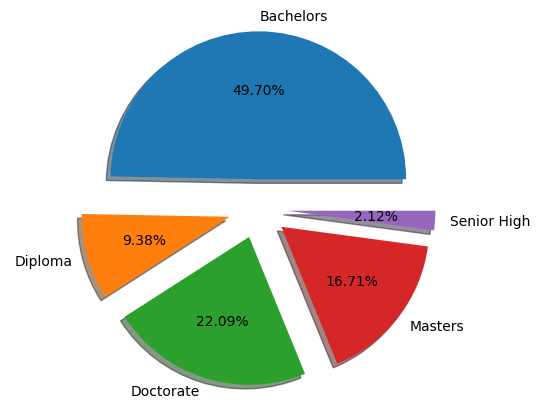

In [51]:
plt.axis('Equal')
plt.pie(Cust_Count_Edu,labels=label_Edu, shadow=True,autopct='%1.2f%%',radius=1,explode=[0.2,0.2,0.2,0.2,0.2])
plt.show()

#### Average spent of customers on each product grouped under Education.

In [52]:
Coke_Spent_Edu=df_train.groupby('Education')['MntCoke'].mean()
Coke_Spent_Edu

Education
Bachelors      287390.986602
Diploma        194051.612903
Doctorate      404463.013699
Masters        337065.217391
Senior High      3285.714286
Name: MntCoke, dtype: float64

In [53]:
Fruits_Spent_Edu=df_train.groupby('Education')['MntFruits'].mean()
Fruits_Spent_Edu

Education
Bachelors      30425.091352
Diploma        28077.419355
Doctorate      19578.082192
Masters        21275.362319
Senior High    10085.714286
Name: MntFruits, dtype: float64

In [54]:
Meat_Spent_Edu=df_train.groupby('Education')['MntMeatProducts'].mean()
Meat_Spent_Edu

Education
Bachelors      182356.881851
Diploma        127503.225806
Doctorate      159230.136986
Masters        155086.956522
Senior High      9571.428571
Name: MntMeatProducts, dtype: float64

In [55]:
Fish_Spent_Edu=df_train.groupby('Education')['MntFishProducts'].mean()
Fish_Spent_Edu

Education
Bachelors      43285.018270
Diploma        44632.258065
Doctorate      27093.150685
Masters        30840.579710
Senior High    13742.857143
Name: MntFishProducts, dtype: float64

In [56]:
Sweet_Spent_Edu=df_train.groupby('Education')['MntSweetProducts'].mean()
Sweet_Spent_Edu

Education
Bachelors      32159.561510
Diploma        32877.419355
Doctorate      19638.356164
Masters        20159.420290
Senior High    10485.714286
Name: MntSweetProducts, dtype: float64

In [57]:
Gold_Spent_Edu=df_train.groupby('Education')['MntGoldProds'].mean()
Gold_Spent_Edu

Education
Bachelors      50618.757613
Diploma        44909.677419
Doctorate      30386.301370
Masters        39902.173913
Senior High    23257.142857
Name: MntGoldProds, dtype: float64

In [58]:
xpos_Edu=np.arange(len(label_Edu))
xpos_Edu

array([0, 1, 2, 3, 4])

#### BAR PLOT OF AMOUNT SPENT ON ITEMS BASED ON EDUCATION

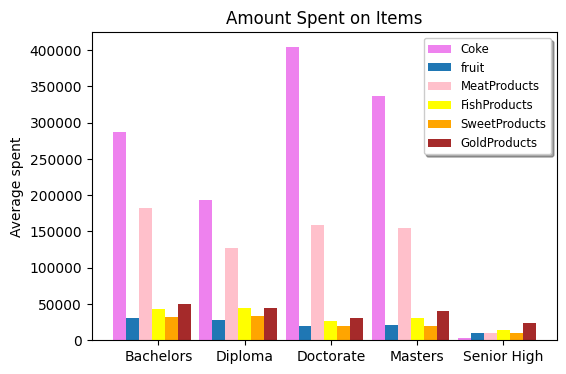

In [59]:
plt.figure(figsize=(6,4))
plt.bar(x=xpos_Edu-0.45,height=Coke_Spent_Edu,width=0.15,label='Coke',color='violet')
plt.bar(x=xpos_Edu-0.3,height=Fruits_Spent_Edu,width=0.15,label='fruit')
plt.bar(x=xpos_Edu-0.15,height=Meat_Spent_Edu,width=0.15,label='MeatProducts',color='pink')
plt.bar(x=xpos_Edu,height=Fish_Spent_Edu,width=0.15,label='FishProducts',color='yellow')
plt.bar(x=xpos_Edu+0.15,height=Sweet_Spent_Edu,width=0.15,label='SweetProducts',color='orange')
plt.bar(x=xpos_Edu+0.3,height=Gold_Spent_Edu,width=0.15,label='GoldProducts',color='brown')

plt.xticks(xpos_Edu,label_Edu)
plt.ylabel('Average spent')
plt.title('Amount Spent on Items')
plt.legend(loc='upper right',shadow=True,fontsize='small')




## Observation:

### 5.EDA Based on No.of Kids

#### PIE Chart representation of customer count based on No. of kids

In [60]:
Cust_Count_Kids=df_train.groupby('Kidhome').count()['ID']
Cust_Count_Kids

Kidhome
0    949
1    662
2     41
Name: ID, dtype: int64

In [61]:
label_Kids=df_train.groupby('Kidhome').count()['ID'].index
label_Kids

Index([0, 1, 2], dtype='int64', name='Kidhome')

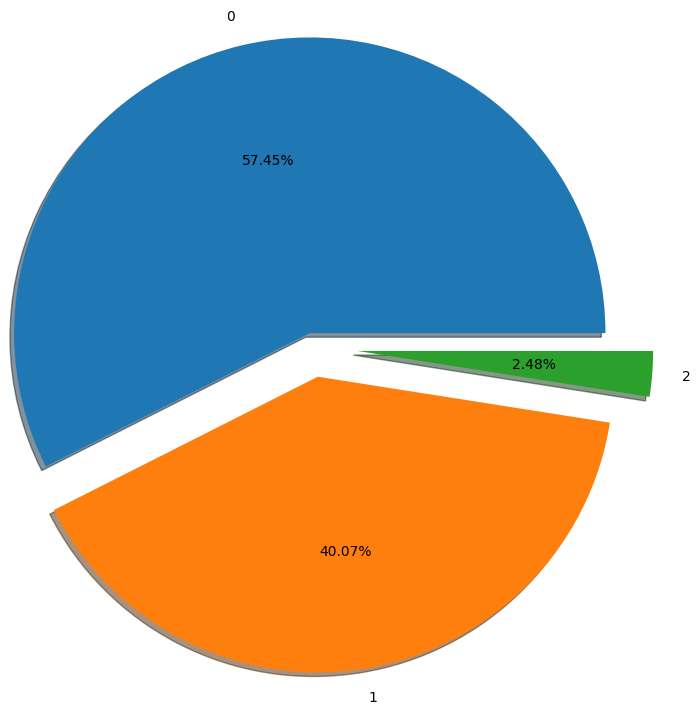

In [62]:
plt.axis('equal')
plt.pie(Cust_Count_Kids,labels=label_Kids,shadow=True,autopct='%1.2f%%',radius=2,explode=[0.1,0.2,0.3])
plt.show()

#### Average spent on products based on kids home

In [63]:
Coke_Spent_Kids=df_train.groupby('Kidhome')['MntCoke'].mean()
Coke_Spent_Kids

Kidhome
0    455943.097998
1    107697.885196
2     68634.146341
Name: MntCoke, dtype: float64

In [64]:
Fruits_Spent_Kids=df_train.groupby('Kidhome')['MntFruits'].mean()
Fruits_Spent_Kids

Kidhome
0    39010.537408
1     8170.694864
2     6634.146341
Name: MntFruits, dtype: float64

In [65]:
Meat_Spent_Kids=df_train.groupby('Kidhome')['MntMeatProducts'].mean()
Meat_Spent_Kids

Kidhome
0    249428.872497
1     49418.429003
2     32024.390244
Name: MntMeatProducts, dtype: float64

In [66]:
Fish_Spent_Kids=df_train.groupby('Kidhome')['MntFishProducts'].mean()
Fish_Spent_Kids

Kidhome
0    56049.525817
1    11867.069486
2     7073.170732
Name: MntFishProducts, dtype: float64

In [67]:
Sweet_Spent_Kids=df_train.groupby('Kidhome')['MntSweetProducts'].mean()
Sweet_Spent_Kids

Kidhome
0    41047.418335
1     8268.882175
2     4146.341463
Name: MntSweetProducts, dtype: float64

In [68]:
Gold_Spent_Kids=df_train.groupby('Kidhome')['MntGoldProds'].mean()
Gold_Spent_Kids

Kidhome
0    58993.677555
1    22256.797583
2    17512.195122
Name: MntGoldProds, dtype: float64

In [69]:
xpos_Kids=np.arange(len(label_Kids))
xpos_Kids

array([0, 1, 2])

#### BAR PLOT OF AMOUNT SPENT ON ITEMS BASED ON KIDS HOME

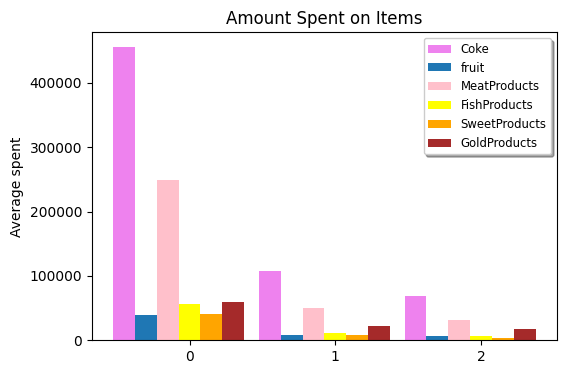

In [70]:
plt.figure(figsize=(6,4))
plt.bar(x=xpos_Kids-0.45,height=Coke_Spent_Kids,width=0.15,label='Coke',color='violet')
plt.bar(x=xpos_Kids-0.3,height=Fruits_Spent_Kids,width=0.15,label='fruit')
plt.bar(x=xpos_Kids-0.15,height=Meat_Spent_Kids,width=0.15,label='MeatProducts',color='pink')
plt.bar(x=xpos_Kids,height=Fish_Spent_Kids,width=0.15,label='FishProducts',color='yellow')
plt.bar(x=xpos_Kids+0.15,height=Sweet_Spent_Kids,width=0.15,label='SweetProducts',color='orange')
plt.bar(x=xpos_Kids+0.3,height=Gold_Spent_Kids,width=0.15,label='GoldProducts',color='brown')

plt.xticks(xpos_Kids,label_Kids)
plt.ylabel('Average spent')
plt.title('Amount Spent on Items')
plt.legend(loc='upper right',shadow=True,fontsize='small')



## Observations:

### 6.EDA based on Marital Status

In [71]:
Cust_Count_MS=df_train.groupby('Marital_Status').count()['ID']
Cust_Count_MS

Marital_Status
Bachelor    352
Divorced    174
Engaged     429
Married     642
Widow        52
Widower       3
Name: ID, dtype: int64

In [72]:
label_MS=df_train.groupby('Marital_Status').count()['ID'].index
label_MS

Index(['Bachelor', 'Divorced', 'Engaged', 'Married', 'Widow', 'Widower'], dtype='object', name='Marital_Status')

#### PIE Chart representation of customer count based on Marital Status

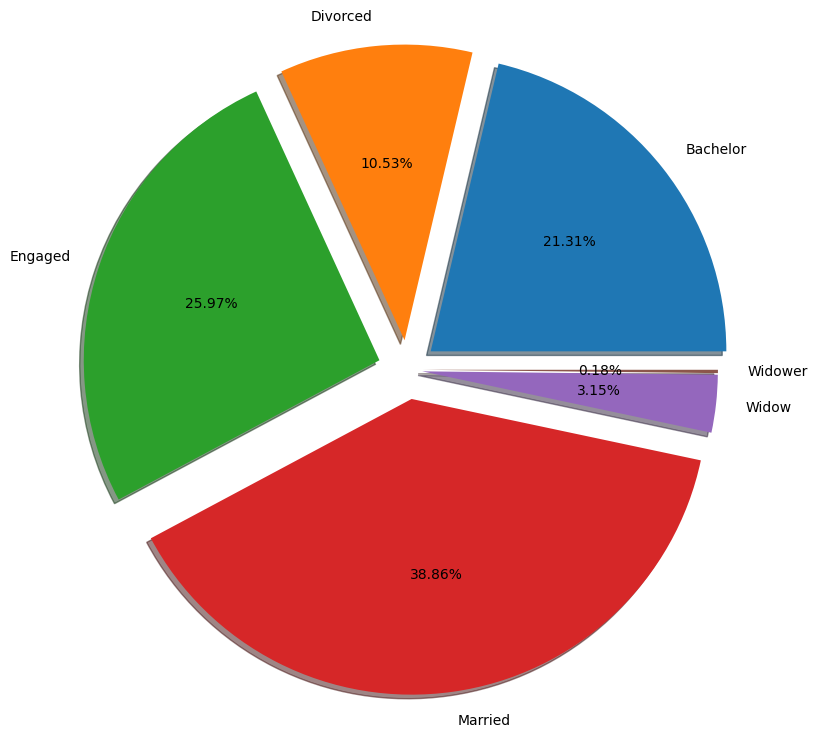

In [73]:
plt.axis('equal')
plt.pie(Cust_Count_MS,labels=label_MS,shadow=True,autopct='%1.2f%%',radius=2,explode=[0.2,0.2,0.2,0.2,0.1,0.1])
plt.show()

#### Average spent on products based on Marital Status

In [74]:
Coke_Spent_MS=df_train.groupby('Marital_Status')['MntCoke'].mean()
Coke_Spent_MS

Marital_Status
Bachelor    295017.045455
Divorced    327258.620690
Engaged     313925.407925
Married     301445.482866
Widow       331826.923077
Widower     184666.666667
Name: MntCoke, dtype: float64

In [75]:
Fruits_Spent_MS=df_train.groupby('Marital_Status')['MntFruits'].mean()
Fruits_Spent_MS

Marital_Status
Bachelor    28732.954545
Divorced    27321.839080
Engaged     24314.685315
Married     24615.264798
Widow       30538.461538
Widower      4000.000000
Name: MntFruits, dtype: float64

In [76]:
Meat_Spent_MS=df_train.groupby('Marital_Status')['MntMeatProducts'].mean()
Meat_Spent_MS

Marital_Status
Bachelor    189491.477273
Divorced    145764.367816
Engaged     163375.291375
Married     156183.800623
Widow       158365.384615
Widower      26333.333333
Name: MntMeatProducts, dtype: float64

In [77]:
Fish_Spent_MS=df_train.groupby('Marital_Status')['MntFishProducts'].mean()
Fish_Spent_MS

Marital_Status
Bachelor    41448.863636
Divorced    35000.000000
Engaged     38181.818182
Married     33975.077882
Widow       46961.538462
Widower      7666.666667
Name: MntFishProducts, dtype: float64

In [78]:
Sweet_Spent_MS=df_train.groupby('Marital_Status')['MntSweetProducts'].mean()
Sweet_Spent_MS

Marital_Status
Bachelor    27713.068182
Divorced    27764.367816
Engaged     26435.897436
Married     26210.280374
Widow       35057.692308
Widower      7000.000000
Name: MntSweetProducts, dtype: float64

In [79]:
Gold_Spent_MS=df_train.groupby('Marital_Status')['MntGoldProds'].mean()
Gold_Spent_MS

Marital_Status
Bachelor    45562.500000
Divorced    47741.379310
Engaged     43249.417249
Married     40288.161994
Widow       49846.153846
Widower     27000.000000
Name: MntGoldProds, dtype: float64

In [80]:
xpos_MS=np.arange(len(label_MS))
xpos_MS

array([0, 1, 2, 3, 4, 5])

#### BAR PLOT OF AMOUNT SPENT ON ITEMS BASED ON MARITAL STATUS.

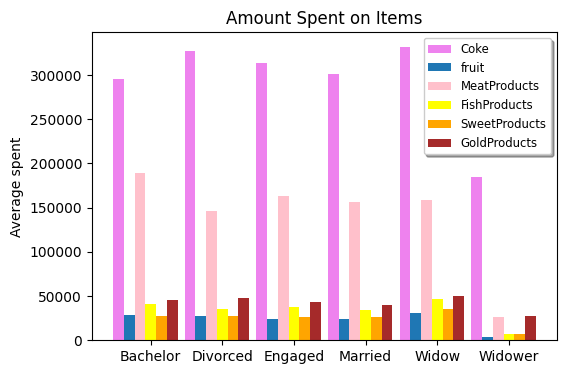

In [81]:
plt.figure(figsize=(6,4))
plt.bar(x=xpos_MS-0.45,height=Coke_Spent_MS,width=0.15,label='Coke',color='violet')
plt.bar(x=xpos_MS-0.3,height=Fruits_Spent_MS,width=0.15,label='fruit')
plt.bar(x=xpos_MS-0.15,height=Meat_Spent_MS,width=0.15,label='MeatProducts',color='pink')
plt.bar(x=xpos_MS,height=Fish_Spent_MS,width=0.15,label='FishProducts',color='yellow')
plt.bar(x=xpos_MS+0.15,height=Sweet_Spent_MS,width=0.15,label='SweetProducts',color='orange')
plt.bar(x=xpos_MS+0.3,height=Gold_Spent_MS,width=0.15,label='GoldProducts',color='brown')

plt.xticks(xpos_MS,label_MS)
plt.ylabel('Average spent')
plt.title('Amount Spent on Items')
plt.legend(loc='upper right',shadow=True,fontsize='small')


### Observations:

## 7.Age Analysis

In [82]:
Cust_Count_Age=df_train.groupby('Age').count()['ID']
Cust_Count_Age

Age
27     2
28     3
29     3
30     4
31     9
32    12
33    11
34    26
35    26
36    22
37    32
38    24
39    21
40    28
41    31
42    28
43    28
44    38
45    61
46    37
47    65
48    60
49    48
50    55
51    64
52    59
53    59
54    53
55    35
56    35
57    37
58    60
59    29
60    33
61    34
62    29
63    42
64    37
65    44
66    26
67    40
68    33
69    36
70    31
71    41
72    25
73    20
74    18
75    18
76     8
77    13
78     6
79     7
80     5
82     1
Name: ID, dtype: int64

In [83]:
label_Age=df_train.groupby('Age').count()['ID'].index
label_Age

Index([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       82],
      dtype='int64', name='Age')

In [84]:
xpos_Age=np.arange(len(label_Age))
xpos_Age

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

#### AGE DISTRIBUTION

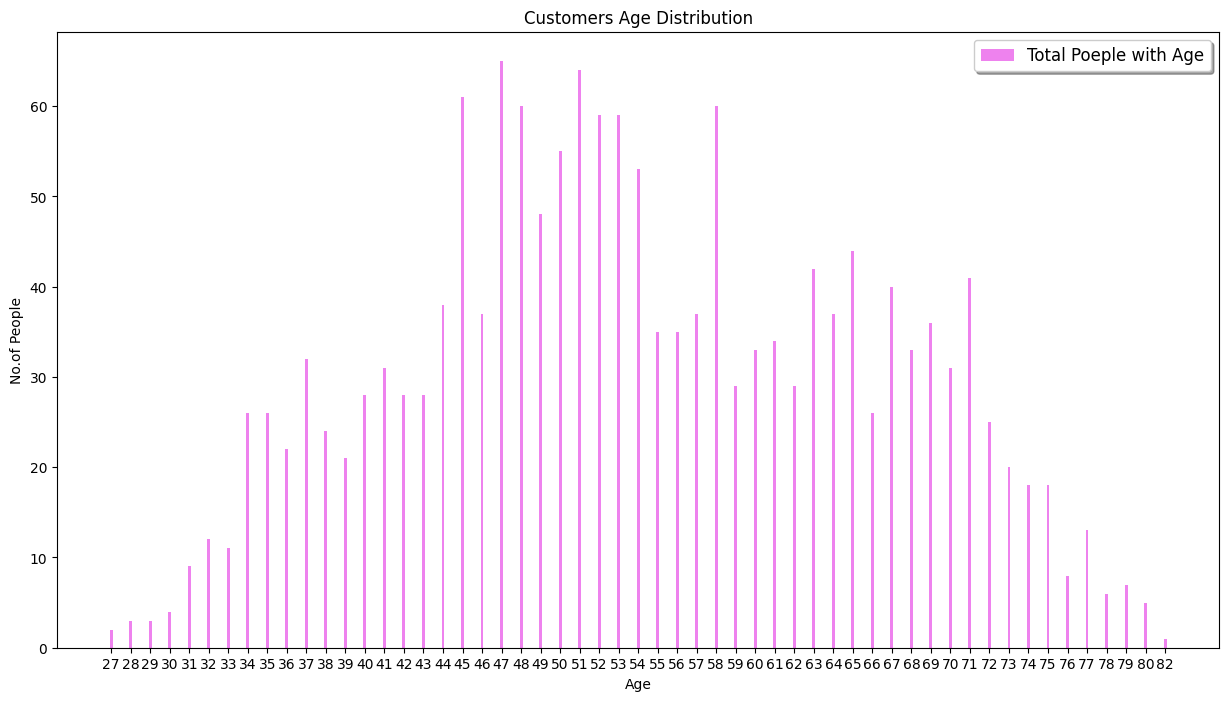

In [85]:
plt.figure(figsize=(15,8))
plt.bar(xpos_Age,height=Cust_Count_Age,width=0.15,label='Total Poeple with Age',color='violet')

plt.xticks(xpos_Age,label_Age)
plt.xlabel('Age')
plt.ylabel('No.of People')
plt.title('Customers Age Distribution')
plt.legend(loc='best',shadow=True,fontsize='large')

### Observations:

## 8.Income and Kids home Correlation

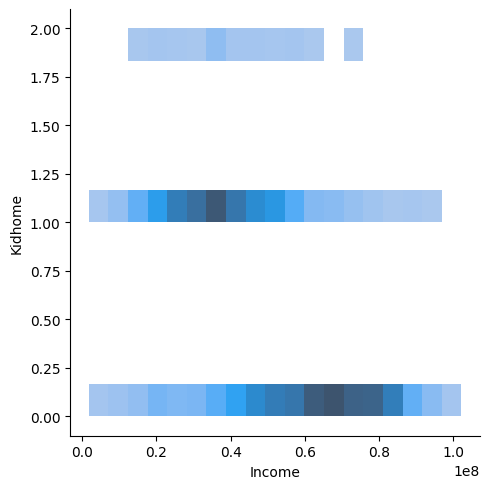

In [86]:
sns.displot(x=df_train['Income'],y=df_train['Kidhome'])

In [87]:
df_train.groupby('Kidhome')['Income'].mean()

Kidhome
0    6.131943e+07
1    3.833666e+07
2    3.880680e+07
Name: Income, dtype: float64

## 9.Correlation between Income and Education

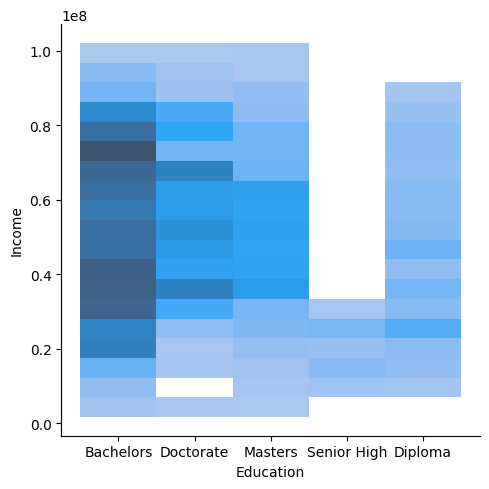

In [88]:
sns.displot(data=df_train,x='Education',y='Income')

## 10.Correlation between All Features

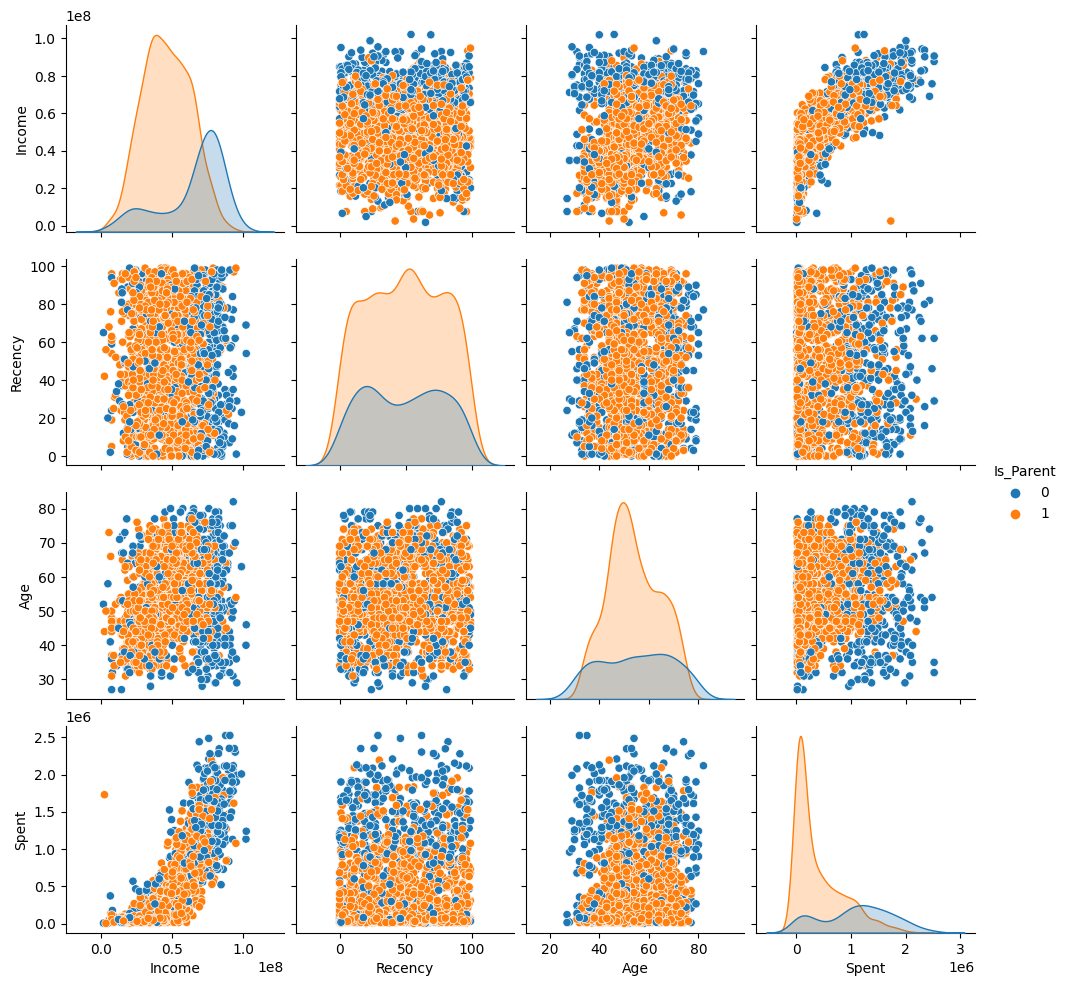

In [89]:
# A Pairplot
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
sns.pairplot(df_train[To_Plot], hue= "Is_Parent")
plt.show()

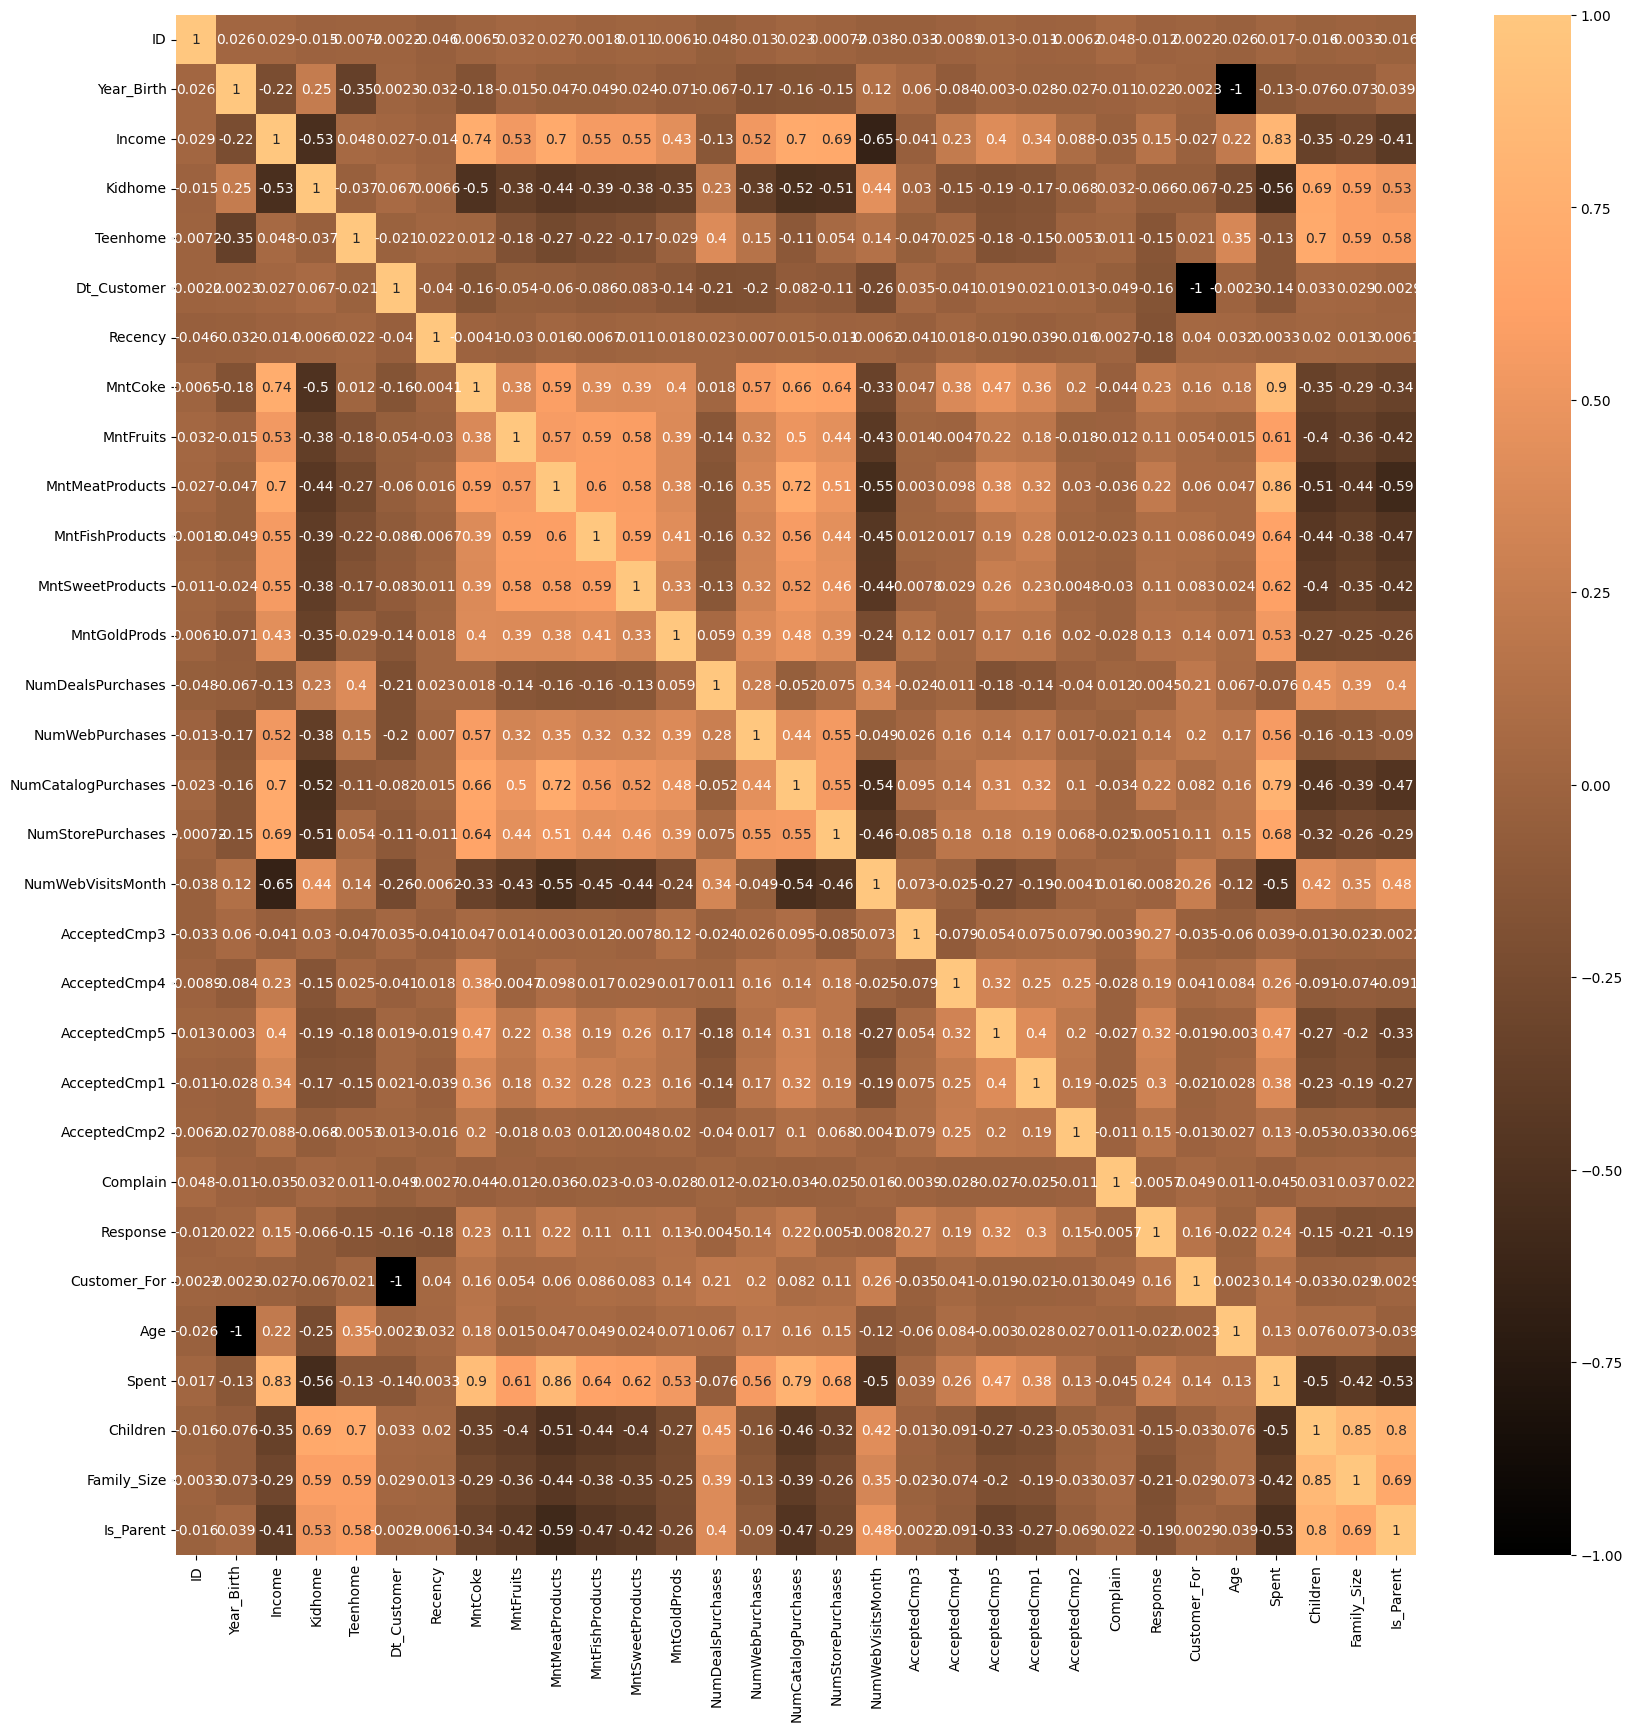

In [90]:
# Correlation Matrix
df_numeric=df_train.drop(['Education','Marital_Status','Living_With','Education_Levels'],axis=1)
corr=df_numeric.corr()
corr
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='copper', annot=True)
plt.show()

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">7.Data Preprocessing</p>

### TRAINING DATASET

In [91]:
df_train2=df_train.copy()
df_train2.shape

(1652, 35)

In [92]:
#Removing some columns before encoding
df_train2=df_train2.drop(['ID','Living_With','Dt_Customer','Education_Levels','Complain','Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Customer_For','NumWebVisitsMonth'],axis=1)

In [93]:
df_train2.head()

Year_Birth  Education Marital_Status      Income  Kidhome  Teenhome   
0        1957  Bachelors       Bachelor  58138000.0        0         0  \
1        1954  Bachelors       Bachelor  46344000.0        1         1   
2        1965  Bachelors        Engaged  71613000.0        0         0   
3        1984  Bachelors        Engaged  26646000.0        1         0   
4        1981  Doctorate        Married  58293000.0        1         0   

   Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0       58   635000      88000           546000           172000  \
1       38    11000       1000             6000             2000   
2       26   426000      49000           127000           111000   
3       26    11000       4000            20000            10000   
4       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             88000         88000                  3                8  \
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                   10                  4   66  1617000         0  \
1                    1                  2   69    27000         2   
2                    2                 10   58   776000         0   
3                    0                  4   39    53000         1   
4                    3                  6   42   422000         1   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1

### 1.ENCODING

In [94]:
from sklearn.preprocessing import LabelEncoder

s = (df_train2.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
   len(object_cols))

Categorical variables:
['Education', 'Marital_Status']
No. of. categorical features:  2


In [95]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()
for i in object_cols:
    df_train2[i]=df_train2[[i]].apply(labenc.fit_transform)
    
df_train2.head()

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0        1957          0               0  58138000.0        0         0  \
1        1954          0               0  46344000.0        1         1   
2        1965          0               2  71613000.0        0         0   
3        1984          0               2  26646000.0        1         0   
4        1981          2               3  58293000.0        1         0   

   Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0       58   635000      88000           546000           172000  \
1       38    11000       1000             6000             2000   
2       26   426000      49000           127000           111000   
3       26    11000       4000            20000            10000   
4       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             88000         88000                  3                8  \
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                   10                  4   66  1617000         0  \
1                    1                  2   69    27000         2   
2                    2                 10   58   776000         0   
3                    0                  4   39    53000         1   
4                    3                  6   42   422000         1   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1

In [96]:
df_train2.shape

(1652, 22)

### 2.SCALING

In [97]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaled_data = scaler.fit_transform(df_train2)
scaled_data

array([[-1.02386985, -0.89745927, -1.58121021, ..., -1.25204008,
        -1.74681513, -1.5718105 ],
       [-1.2809005 , -0.89745927, -1.58121021, ...,  1.38114924,
         0.43769554,  0.63620901],
       [-0.3384548 , -0.89745927,  0.06114079, ..., -1.25204008,
        -0.6545598 , -1.5718105 ],
       ...,
       [ 0.86102154,  2.30297832, -1.58121021, ...,  0.06455458,
        -0.6545598 ,  0.63620901],
       [ 0.6039909 ,  0.70275953,  0.88231629, ...,  0.06455458,
         0.43769554,  0.63620901],
       [ 0.94669842, -0.89745927,  0.88231629, ...,  0.06455458,
         0.43769554,  0.63620901]])

In [98]:
scaled_df=pd.DataFrame(scaled_data)
scaled_df.columns=df_train2.columns
scaled_df

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome   
0      -1.023870  -0.897459       -1.581210  0.321793 -0.826149 -0.910858  \
1      -1.280900  -0.897459       -1.581210 -0.254367  1.008257  0.908655   
2      -0.338455  -0.897459        0.061141  0.980072 -0.826149 -0.910858   
3       1.289406  -0.897459        0.061141 -1.216653  1.008257 -0.910858   
4       1.032375   0.702760        0.882316  0.329365  1.008257 -0.910858   
...          ...        ...             ...       ...       ...       ...   
1647    1.889144  -0.097350        0.061141 -1.531894 -0.826149 -0.910858   
1648    0.518314  -0.897459        0.882316 -1.171367  1.008257 -0.910858   
1649    0.861022   2.302978       -1.581210 -1.743472  1.008257 -0.910858   
1650    0.603991   0.702760        0.882316 -0.098041  1.008257 -0.910858   
1651    0.946698  -0.897459        0.882316 -0.895109  1.008257 -0.910858   

       Recency   MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0     0.308238  0.967993   1.583179         1.768383         2.484299  \
1    -0.384234 -0.872319  -0.632969        -0.730665        -0.647068   
2    -0.799718  0.351607   0.589733        -0.170693         1.360691   
3    -0.799718 -0.872319  -0.556550        -0.665875        -0.499710   
4     1.554689 -0.394545   0.436895        -0.212344         0.163403   
...        ...       ...        ...              ...              ...   
1647 -1.076707 -0.881167  -0.454659        -0.656619        -0.241832   
1648 -0.141869 -0.757299  -0.276348        -0.249367         0.034465   
1649 -0.799718 -0.901811  -0.632969        -0.739921        -0.481290   
1650 -1.699932  0.003599  -0.658442        -0.420598        -0.683908   
1651 -0.730471 -0.839877  -0.607496        -0.614969        -0.554969   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             1.480826      0.885096           0.349557         1.513322  \
1            -0.631046     -0.736493          -0.174937        -1.169501   
2            -0.145558     -0.024576          -0.699431         1.513322   
3            -0.582497     -0.756268          -0.174937        -0.786240   
4             0.000088     -0.558513           1.398545         0.363541   
...                ...           ...                ...              ...   
1647         -0.388302     -0.677166          -0.699431        -1.169501   
1648         -0.291204     -0.558513           0.874051         0.363541   
1649         -0.436851     -0.657391          -0.699431        -1.169501   
1650         -0.655320     -0.400310          -0.174937         0.363541   
1651         -0.558223     -0.756268          -0.699431        -0.786240   

      NumCatalogPurchases  NumStorePurchases       Age     Spent  Children   
0                2.624855          -0.562301  1.023870  1.687226 -1.252040  \
1               -0.584284          -1.182201  1.280900 -0.960723  1.381149   
2               -0.227713           1.297401  0.338455  0.286644 -1.252040   
3               -0.940855          -0.562301 -1.289406 -0.917423  0.064555   
4                0.128858           0.057600 -1.032375 -0.302899  0.064555   
...                   ...                ...       ...       ...       ...   
1647            -0.584284          -0.562301 -1.889144 -0.869127 -1.252040   
1648            -0.584284          -0.562301 -0.518314 -0.599336  0.064555   
1649            -0.940855          -0.872251 -0.861022 -0.945734  0.064555   
1650            -0.584284           0.677500 -0.603991 -0.332876  0.064555   
1651            -0.940855          -0.872251 -0.946698 -0.887446  0.064555   

      Family_Size  Is_Parent  
0       -1.746815  -1.571810  
1        0.437696   0.636209  
2       -0.654560  -1.571810  
3        0.437696   0.636209  
4        0.437696   0.636209  
...           ...        ...  
1647    -0.654560  -1.571810  
1648     0.437696   0.636209  
1649    -0.654560   0.636209  
1650     0.437696   0.636209  
1651     0.43

In [99]:
df_train2.head()

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0        1957          0               0  58138000.0        0         0  \
1        1954          0               0  46344000.0        1         1   
2        1965          0               2  71613000.0        0         0   
3        1984          0               2  26646000.0        1         0   
4        1981          2               3  58293000.0        1         0   

   Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0       58   635000      88000           546000           172000  \
1       38    11000       1000             6000             2000   
2       26   426000      49000           127000           111000   
3       26    11000       4000            20000            10000   
4       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             88000         88000                  3                8  \
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                   10                  4   66  1617000         0  \
1                    1                  2   69    27000         2   
2                    2                 10   58   776000         0   
3                    0                  4   39    53000         1   
4                    3                  6   42   422000         1   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1

### TESTING DATASET

In [100]:
df_test2=df_test.copy()
df_test2.shape

(549, 35)

In [101]:
#Removing some columns:
df_test2=df_test2.drop(['ID','Living_With','Dt_Customer','Education_Levels','Complain','Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Customer_For','NumWebVisitsMonth'],axis=1)

In [102]:
df_test2.head()

Year_Birth  Education Marital_Status      Income  Kidhome  Teenhome   
0        1971  Bachelors        Engaged  38232000.0        1         1  \
1        1955  Doctorate        Married  22554000.0        1         1   
2        1983  Doctorate        Married  23536000.0        1         0   
3        1952  Bachelors        Married  49413000.0        0         1   
4        1969  Bachelors        Married  42231000.0        1         1   

   Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0       84    43000       5000            28000             7000  \
1       38    27000          0            10000                0   
2       53     6000          0             3000                0   
3       88   205000       7000            41000             3000   
4       99    24000          0             8000                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0              6000         33000                  4                3  \
1                 0          4000                  4                2   
2                 0          1000                  1                0   
3              2000         46000                  2                4   
4              1000          4000                  1                1   

   NumCatalogPurchases  NumStorePurchases  Age   Spent  Children  Family_Size   
0                    1                  3   52  122000         2            4  \
1                    0                  4   68   41000         2            4   
2                    0                  3   40   10000         1            3   
3                    2                  5   71  304000         1            3   
4                    0                  3   54   37000         2            4   

   Is_Parent  
0          1  
1          1  
2          1  
3          1  
4          1

### 1.ENCODING

In [103]:
from sklearn.preprocessing import LabelEncoder

s_test = (df_test2.dtypes == 'object')
object_cols_test = list(s_test[s_test].index)
print("Categorical variables:")
print(object_cols_test)
print('No. of. categorical features: ',
   len(object_cols_test))

Categorical variables:
['Education', 'Marital_Status']
No. of. categorical features:  2


In [104]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc_test=LabelEncoder()
for i in object_cols_test:
    df_test2[i]=df_test2[[i]].apply(labenc_test.fit_transform)
    
df_test2.head()

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0        1971          0               2  38232000.0        1         1  \
1        1955          2               3  22554000.0        1         1   
2        1983          2               3  23536000.0        1         0   
3        1952          0               3  49413000.0        0         1   
4        1969          0               3  42231000.0        1         1   

   Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0       84    43000       5000            28000             7000  \
1       38    27000          0            10000                0   
2       53     6000          0             3000                0   
3       88   205000       7000            41000             3000   
4       99    24000          0             8000                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0              6000         33000                  4                3  \
1                 0          4000                  4                2   
2                 0          1000                  1                0   
3              2000         46000                  2                4   
4              1000          4000                  1                1   

   NumCatalogPurchases  NumStorePurchases  Age   Spent  Children  Family_Size   
0                    1                  3   52  122000         2            4  \
1                    0                  4   68   41000         2            4   
2                    0                  3   40   10000         1            3   
3                    2                  5   71  304000         1            3   
4                    0                  3   54   37000         2            4   

   Is_Parent  
0          1  
1          1  
2          1  
3          1  
4          1

In [105]:
df_test2.shape

(549, 22)

### 2.SCALING

In [106]:
from sklearn.preprocessing import StandardScaler


scaler_test = StandardScaler()


scaled_data_test = scaler_test.fit_transform(df_test2)
scaled_data_test

array([[ 0.18824063, -0.85000258,  0.05433931, ...,  1.47016986,
         1.61944601,  0.60751733],
       [-1.16931741,  0.69776331,  0.86061711, ...,  1.47016986,
         1.61944601,  0.60751733],
       [ 1.20640916,  0.69776331,  0.86061711, ...,  0.07134273,
         0.47520423,  0.60751733],
       ...,
       [ 1.03671441, -0.85000258, -0.7519385 , ..., -1.3274844 ,
        -1.81327931, -1.64604358],
       [-1.08447004,  1.47164625,  0.05433931, ...,  0.07134273,
         0.47520423,  0.60751733],
       [-1.25416479,  0.69776331,  0.86061711, ...,  1.47016986,
         1.61944601,  0.60751733]])

In [107]:
scaled_df_test=pd.DataFrame(scaled_data_test)
scaled_df_test.columns=df_test2.columns
scaled_df_test

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome   
0      0.188241  -0.850003        0.054339 -0.629737  1.131766  0.894199  \
1     -1.169317   0.697763        0.860617 -1.373984  1.131766  0.894199   
2      1.206409   0.697763        0.860617 -1.327368  1.131766 -1.001227   
3     -1.423860  -0.850003        0.860617 -0.098967 -0.822132  0.894199   
4      0.018546  -0.850003        0.860617 -0.439902  1.131766  0.894199   
..          ...        ...             ...       ...       ...       ...   
544   -0.151149  -0.850003        0.860617  0.461663 -0.822132  0.894199   
545   -1.932944   0.697763        0.054339  0.594153  3.085663  0.894199   
546    1.036714  -0.850003       -0.751939  0.260292 -0.822132 -1.001227   
547   -1.084470   1.471646        0.054339  0.842473 -0.822132  0.894199   
548   -1.254165   0.697763        0.860617  0.065092  1.131766  0.894199   

      Recency   MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0    1.207813 -0.784571  -0.556300        -0.633347        -0.577384  \
1   -0.375972 -0.832828  -0.680208        -0.714256        -0.702308   
2    0.140480 -0.896165  -0.680208        -0.745721        -0.702308   
3    1.345533 -0.295973  -0.506737        -0.574913        -0.648769   
4    1.724264 -0.841876  -0.680208        -0.723246        -0.702308   
..        ...       ...        ...              ...              ...   
544 -0.100531  1.224111   0.385402         0.058877         0.047232   
545  0.243770  0.310251  -0.680208        -0.624357        -0.702308   
546  1.448823  1.824303   0.509310         0.216200        -0.131230   
547 -1.408875  0.376604   0.063241         0.202715         0.725388   
548 -0.307111 -0.660914  -0.605863        -0.485013        -0.666615   

     MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0           -0.528461     -0.238822           0.941360        -0.407435  \
1           -0.681575     -0.770908           0.941360        -0.748934   
2           -0.681575     -0.825951          -0.706270        -1.431932   
3           -0.630537     -0.000301          -0.157060        -0.065936   
4           -0.656056     -0.770908          -0.706270        -1.090433   
..                ...           ...                ...              ...   
544          2.329664      3.687606          -0.157060         1.641559   
545         -0.681575     -0.697517           2.588989         1.300060   
546         -0.375347     -0.403952          -0.706270        -0.748934   
547          0.083994      0.274916          -0.157060         0.617062   
548         -0.656056     -0.458996           0.392150        -0.407435   

     NumCatalogPurchases  NumStorePurchases       Age     Spent  Children   
0              -0.595710          -0.869895 -0.188241 -0.811787  1.470170  \
1              -0.959903          -0.562972  1.169317 -0.946100  1.470170   
2              -0.959903          -0.869895 -1.206409 -0.997504  0.071343   
3              -0.231518          -0.256049  1.423860 -0.509995  0.071343   
4              -0.959903          -0.869895 -0.018546 -0.952733  1.470170   
..                   ...                ...       ...       ...       ...   
544             0.132675          -0.562972  0.151149  1.209550  0.071343   
545            -0.231518          -0.256049  1.932944 -0.277848  2.868997   
546             0.132675           2.199336 -1.036714  1.043731 -1.327484   
547             0.861060           1.278567  1.084470  0.383770  0.071343   
548            -0.595710          -0.562972  1.254165 -0.728877  1.470170   

     Family_Size  Is_Parent  
0       1.619446   0.607517  
1       1.619446   0.607517  
2       0.475204   0.607517  
3       0.475204   0.607517  
4       1.619446   0.607517  
..           ...        ...  
544     0.475204   0.607517  
545     2.763688   0.607517  
546    -1.813279  -1.646044  
547     0.475204   0.607517  
548     1.619446   0.607517  

[549 rows x 22 columns]

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">8.Clustering</p>

## TRAINING DATASET

## 1.KMeans

In [108]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)

score = silhouette_score(scaled_df, kmeans.labels_, metric='euclidean')
score

0.13774443237728684

In [109]:
#### To improve KMeans score adding 'NumWebVisitsMonth' column to the dataset
df_train3=df_train.copy()
#Removing some columns before encoding
df_train3=df_train3.drop(['ID','Living_With','Dt_Customer','Education_Levels','Complain','Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Customer_For'],axis=1)
df_train3

Year_Birth    Education Marital_Status      Income  Kidhome  Teenhome   
0           1957    Bachelors       Bachelor  58138000.0        0         0  \
1           1954    Bachelors       Bachelor  46344000.0        1         1   
2           1965    Bachelors        Engaged  71613000.0        0         0   
3           1984    Bachelors        Engaged  26646000.0        1         0   
4           1981    Doctorate        Married  58293000.0        1         0   
...          ...          ...            ...         ...      ...       ...   
1675        1991      Diploma        Engaged  20193000.0        0         0   
1676        1975    Bachelors        Married  27573000.0        1         0   
1677        1979  Senior High       Bachelor  15862000.0        1         0   
1678        1976    Doctorate        Married  49544000.0        1         0   
1679        1980    Bachelors        Married  33228000.0        1         0   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0          58   635000      88000           546000           172000  \
1          38    11000       1000             6000             2000   
2          26   426000      49000           127000           111000   
3          26    11000       4000            20000            10000   
4          94   173000      43000           118000            46000   
...       ...      ...        ...              ...              ...   
1675       18     8000       8000            22000            24000   
1676       45    50000      15000           110000            39000   
1677       26     1000       1000             4000            11000   
1678        0   308000          0            73000                0   
1679       28    22000       2000            31000             7000   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0                88000         88000                  3                8  \
1                 1000          6000                  2                1   
2                21000         42000                  1                8   
3                 3000          5000                  2                2   
4                27000         15000                  5                5   
...                ...           ...                ...              ...   
1675             11000          9000                  1                1   
1676             15000         15000                  4                5   
1677              9000         10000                  1                1   
1678                 0         23000                  2                5   
1679              4000          5000                  1                2   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Age    Spent   
0                      10                  4                  7   66  1617000  \
1                       1                  2                  5   69    27000   
2                       2                 10                  4   58   776000   
3                       0                  4                  6   39    53000   
4                       3                  6                  5   42   422000   
...                   ...                ...                ...  ...      ...   
1675                    1                  4                  4   32    82000   
1676                    1                  4                  8   48   244000   
1677                    0                  3                  8   44    36000   
1678                    1                  8                  7   47   404000   
1679                    0                  3                  7   43    71000   

      Children  Family_Size  Is_Parent  
0            0            1          0  
1            2            3          1  
2            0            2          0  
3            1            3          1  
4            1            3          1  
...        ...          ...        ...  
1675         0            2    

In [110]:
from sklearn.preprocessing import LabelEncoder

s_df3 = (df_train3.dtypes == 'object')
object_cols_df3 = list(s_df3[s_df3].index)
print("Categorical variables:")
print(object_cols_df3)
print('No. of. categorical features: ',
   len(object_cols_df3))

Categorical variables:
['Education', 'Marital_Status']
No. of. categorical features:  2


In [111]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc_df3=LabelEncoder()
for i in object_cols_df3:
    df_train3[i]=df_train3[[i]].apply(labenc_df3.fit_transform)
    
df_train3.head()

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0        1957          0               0  58138000.0        0         0  \
1        1954          0               0  46344000.0        1         1   
2        1965          0               2  71613000.0        0         0   
3        1984          0               2  26646000.0        1         0   
4        1981          2               3  58293000.0        1         0   

   Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0       58   635000      88000           546000           172000  \
1       38    11000       1000             6000             2000   
2       26   426000      49000           127000           111000   
3       26    11000       4000            20000            10000   
4       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             88000         88000                  3                8  \
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Age    Spent   
0                   10                  4                  7   66  1617000  \
1                    1                  2                  5   69    27000   
2                    2                 10                  4   58   776000   
3                    0                  4                  6   39    53000   
4                    3                  6                  5   42   422000   

   Children  Family_Size  Is_Parent  
0         0            1          0  
1         2            3          1  
2         0            2          0  
3         1            3          1  
4         1            3          1

In [112]:
from sklearn.preprocessing import StandardScaler


scaler_df3 = StandardScaler()


scaled_data_df3 = scaler_df3.fit_transform(df_train3)
scaled_data_df3

array([[-1.02386985, -0.89745927, -1.58121021, ..., -1.25204008,
        -1.74681513, -1.5718105 ],
       [-1.2809005 , -0.89745927, -1.58121021, ...,  1.38114924,
         0.43769554,  0.63620901],
       [-0.3384548 , -0.89745927,  0.06114079, ..., -1.25204008,
        -0.6545598 , -1.5718105 ],
       ...,
       [ 0.86102154,  2.30297832, -1.58121021, ...,  0.06455458,
        -0.6545598 ,  0.63620901],
       [ 0.6039909 ,  0.70275953,  0.88231629, ...,  0.06455458,
         0.43769554,  0.63620901],
       [ 0.94669842, -0.89745927,  0.88231629, ...,  0.06455458,
         0.43769554,  0.63620901]])

In [113]:
scaled_df3=pd.DataFrame(scaled_data_df3)
scaled_df3.columns=df_train3.columns
scaled_df3

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome   
0      -1.023870  -0.897459       -1.581210  0.321793 -0.826149 -0.910858  \
1      -1.280900  -0.897459       -1.581210 -0.254367  1.008257  0.908655   
2      -0.338455  -0.897459        0.061141  0.980072 -0.826149 -0.910858   
3       1.289406  -0.897459        0.061141 -1.216653  1.008257 -0.910858   
4       1.032375   0.702760        0.882316  0.329365  1.008257 -0.910858   
...          ...        ...             ...       ...       ...       ...   
1647    1.889144  -0.097350        0.061141 -1.531894 -0.826149 -0.910858   
1648    0.518314  -0.897459        0.882316 -1.171367  1.008257 -0.910858   
1649    0.861022   2.302978       -1.581210 -1.743472  1.008257 -0.910858   
1650    0.603991   0.702760        0.882316 -0.098041  1.008257 -0.910858   
1651    0.946698  -0.897459        0.882316 -0.895109  1.008257 -0.910858   

       Recency   MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0     0.308238  0.967993   1.583179         1.768383         2.484299  \
1    -0.384234 -0.872319  -0.632969        -0.730665        -0.647068   
2    -0.799718  0.351607   0.589733        -0.170693         1.360691   
3    -0.799718 -0.872319  -0.556550        -0.665875        -0.499710   
4     1.554689 -0.394545   0.436895        -0.212344         0.163403   
...        ...       ...        ...              ...              ...   
1647 -1.076707 -0.881167  -0.454659        -0.656619        -0.241832   
1648 -0.141869 -0.757299  -0.276348        -0.249367         0.034465   
1649 -0.799718 -0.901811  -0.632969        -0.739921        -0.481290   
1650 -1.699932  0.003599  -0.658442        -0.420598        -0.683908   
1651 -0.730471 -0.839877  -0.607496        -0.614969        -0.554969   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             1.480826      0.885096           0.349557         1.513322  \
1            -0.631046     -0.736493          -0.174937        -1.169501   
2            -0.145558     -0.024576          -0.699431         1.513322   
3            -0.582497     -0.756268          -0.174937        -0.786240   
4             0.000088     -0.558513           1.398545         0.363541   
...                ...           ...                ...              ...   
1647         -0.388302     -0.677166          -0.699431        -1.169501   
1648         -0.291204     -0.558513           0.874051         0.363541   
1649         -0.436851     -0.657391          -0.699431        -1.169501   
1650         -0.655320     -0.400310          -0.174937         0.363541   
1651         -0.558223     -0.756268          -0.699431        -0.786240   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age   
0                2.624855          -0.562301           0.674592  1.023870  \
1               -0.584284          -1.182201          -0.146348  1.280900   
2               -0.227713           1.297401          -0.556818  0.338455   
3               -0.940855          -0.562301           0.264122 -1.289406   
4                0.128858           0.057600          -0.146348 -1.032375   
...                   ...                ...                ...       ...   
1647            -0.584284          -0.562301          -0.556818 -1.889144   
1648            -0.584284          -0.562301           1.085062 -0.518314   
1649            -0.940855          -0.872251           1.085062 -0.861022   
1650            -0.584284           0.677500           0.674592 -0.603991   
1651            -0.940855          -0.872251           0.674592 -0.946698   

         Spent  Children  Family_Size  Is_Parent  
0     1.687226 -1.252040    -1.746815  -1.571810  
1    -0.960723  1.381149     0.437696   0.636209  
2     0.286644 -1.252040    -0.654560  -1.571810  
3    -0.917423  0.064555     0.437696   0.636209  
4    -0.302899  0.064555     0.437696   0.636209  
...        ...       ...          ...        ...  
1647 -0.8

In [114]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df3)

score = silhouette_score(scaled_df3, kmeans.labels_, metric='euclidean')
score

0.1516177804142579

#### What I have done here is when the 'NumWebVisitsMonth' column is removed from the dataset the score of KMeans model were 0.13774443237728684.To improve this score I included the above mentioned column and obtained a score of 0.1516177804142579

## 2.Dimensionality Reduction using PCA

In [115]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit_transform(scaled_df)

array([[ 5.38564069, -0.34096964,  0.55898856],
       [-2.85014845,  0.83024948,  1.45885254],
       [ 2.65552668, -0.60484809,  0.66493236],
       ...,
       [-2.74266939, -2.49779823,  0.38227165],
       [-1.28506294, -0.34190366, -0.73185396],
       [-2.62825879, -1.74656087, -0.62369515]])

In [116]:
pca_df=pd.DataFrame(pca.fit_transform(scaled_df),columns=(['col1','col2','col3']))
pca_df

col1      col2      col3
0     5.385629 -0.341085  0.559001
1    -2.850148  0.830235  1.458774
2     2.655516 -0.605090  0.663140
3    -2.711641 -1.947227 -1.137833
4    -0.702301 -0.205630 -1.834222
...        ...       ...       ...
1647 -1.084054 -3.894439 -0.111419
1648 -1.830083 -0.594028 -1.058804
1649 -2.742666 -2.497672  0.383272
1650 -1.285058 -0.341736 -0.731113
1651 -2.628259 -1.746532 -0.623475

[1652 rows x 3 columns]

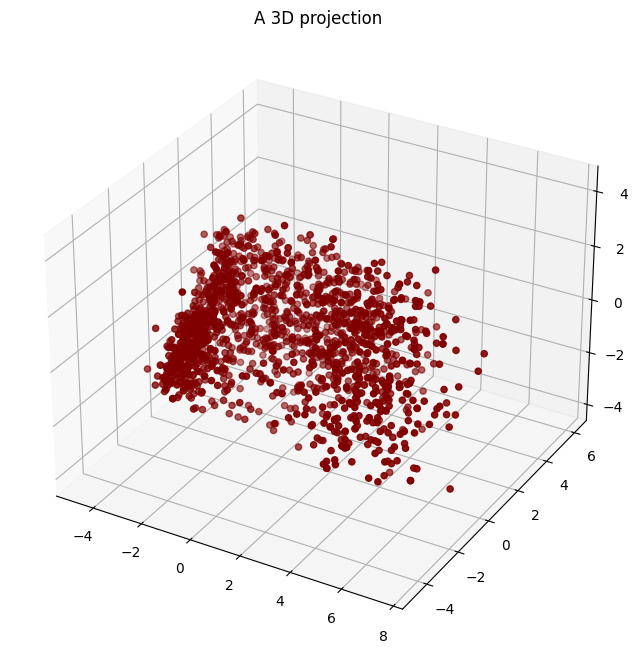

In [117]:
# 3D visualization of PCA data
x=pca_df['col1']
y=pca_df['col2']
z=pca_df['col3']
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='maroon',marker='o')
ax.set_title('A 3D projection')
plt.show()

In [118]:
#Silhouette score using pca dataset
score = silhouette_score(pca_df, kmeans.labels_, metric='euclidean')
score

0.27921379033899024

### Elbow Plot

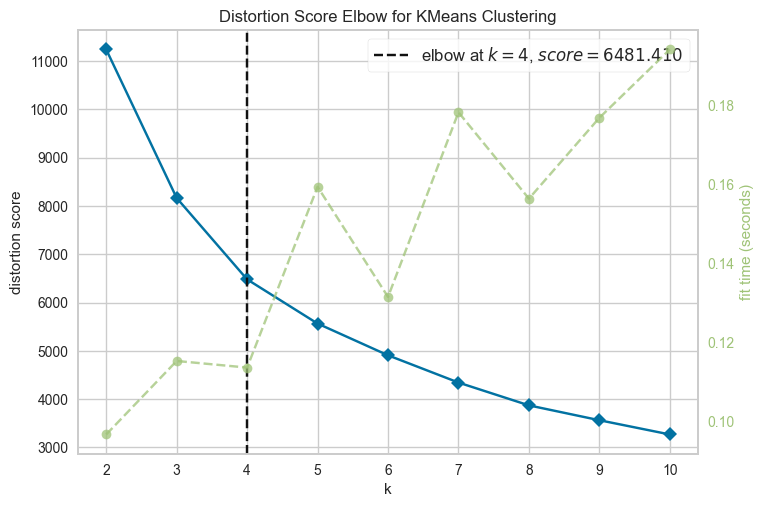

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M=KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()


## Observation:
Distortion score value does'nt change after k=4. So we choose the value for k as 4.

## 3.Agglomerative Clustering

In [120]:
AC=AgglomerativeClustering(n_clusters=4)
yhat_AC=AC.fit_predict(pca_df)
pca_df['Clusters'] = yhat_AC
df_train2['Clusters']=yhat_AC
df_train2

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0           1957          0               0  58138000.0        0         0  \
1           1954          0               0  46344000.0        1         1   
2           1965          0               2  71613000.0        0         0   
3           1984          0               2  26646000.0        1         0   
4           1981          2               3  58293000.0        1         0   
...          ...        ...             ...         ...      ...       ...   
1675        1991          1               2  20193000.0        0         0   
1676        1975          0               3  27573000.0        1         0   
1677        1979          4               0  15862000.0        1         0   
1678        1976          2               3  49544000.0        1         0   
1679        1980          0               3  33228000.0        1         0   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0          58   635000      88000           546000           172000  \
1          38    11000       1000             6000             2000   
2          26   426000      49000           127000           111000   
3          26    11000       4000            20000            10000   
4          94   173000      43000           118000            46000   
...       ...      ...        ...              ...              ...   
1675       18     8000       8000            22000            24000   
1676       45    50000      15000           110000            39000   
1677       26     1000       1000             4000            11000   
1678        0   308000          0            73000                0   
1679       28    22000       2000            31000             7000   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0                88000         88000                  3                8  \
1                 1000          6000                  2                1   
2                21000         42000                  1                8   
3                 3000          5000                  2                2   
4                27000         15000                  5                5   
...                ...           ...                ...              ...   
1675             11000          9000                  1                1   
1676             15000         15000                  4                5   
1677              9000         10000                  1                1   
1678                 0         23000                  2                5   
1679              4000          5000                  1                2   

      NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                      10                  4   66  1617000         0  \
1                       1                  2   69    27000         2   
2                       2                 10   58   776000         0   
3                       0                  4   39    53000         1   
4                       3                  6   42   422000         1   
...                   ...                ...  ...      ...       ...   
1675                    1                  4   32    82000         0   
1676                    1                  4   48   244000         1   
1677                    0                  3   44    36000         1   
1678                    1                  8   47   404000         1   
1679                    0                  3   43    71000         1   

      Family_Size  Is_Parent  Clusters  
0               1          0         2  
1               3          1         3  
2               2          0         2  
3               3          1         1  
4               3          1         0  
...           ...        ...       ...  
1675            2          0         1  
1676            3          1         1  
1677            2          1         1  
1678            3          1

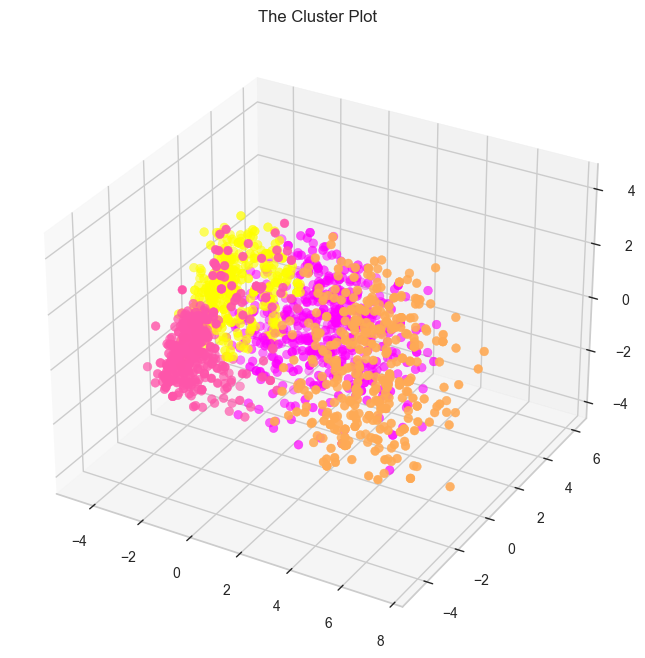

In [121]:
#3d plot with cluster 
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=pca_df['Clusters'],marker='o',cmap='spring')
ax.set_title('The Cluster Plot')
plt.show()

### EDA on Clusters

#### DISTRIBUTION OF CLUSTERS

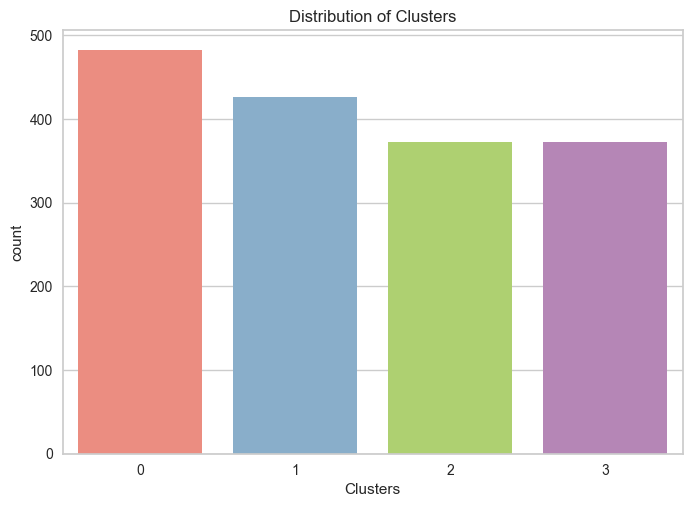

In [122]:
pl=sns.countplot(x=df_train2['Clusters'],palette=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe"])
pl.set_title('Distribution of Clusters')
plt.show()

## Observations:
Most number of customers comes under cluster 0
then comes cluster 1 and cluster 2 & cluster 3 have relatively equal number of customers.

#### CORRELATION OF INCOME AND SPENDING WITH CLUSTERS AS HUE

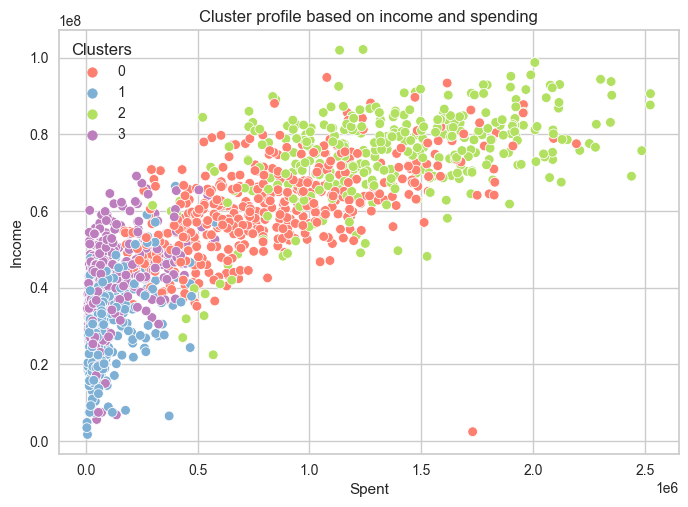

In [123]:
p1=sns.scatterplot(data=df_train2,x=df_train2['Spent'],y=df_train2['Income'],hue=df_train2['Clusters'],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
p1.set_title('Cluster profile based on income and spending')

plt.show()

## Observation:
Clusters show the pattern as

Cluster 0 :Average Income and High Spending
    
Cluster 1 :Low Income and Low Spending
    
Cluster 2 :High Income and High Spending
    
Cluster 3 :Average Income and Average Spending

#### Clusters and Products combined strip and boxenplot

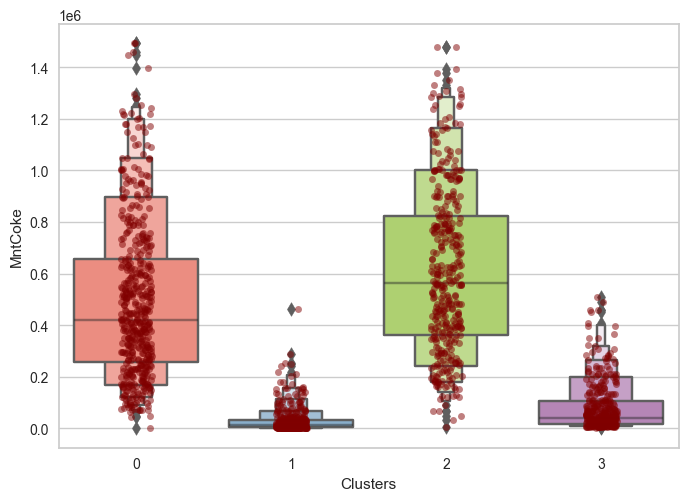

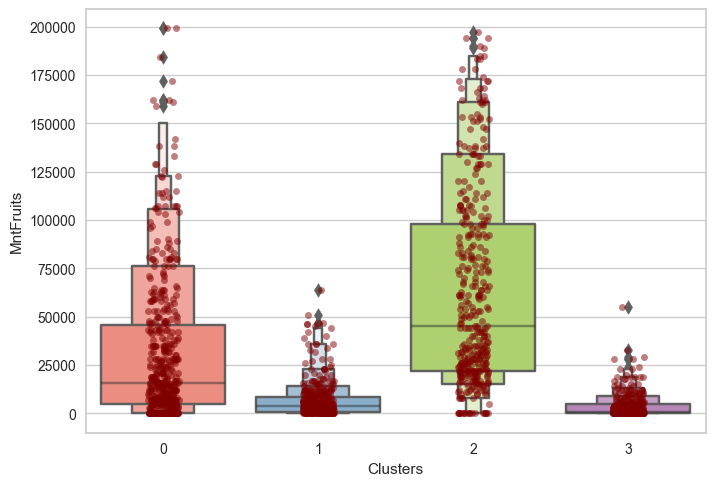

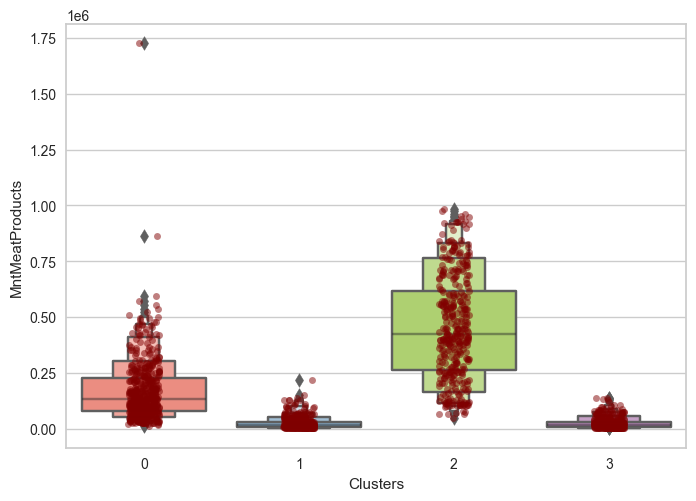

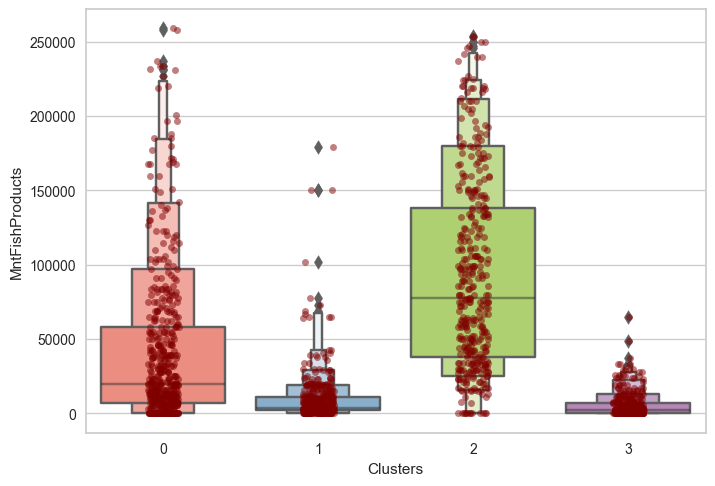

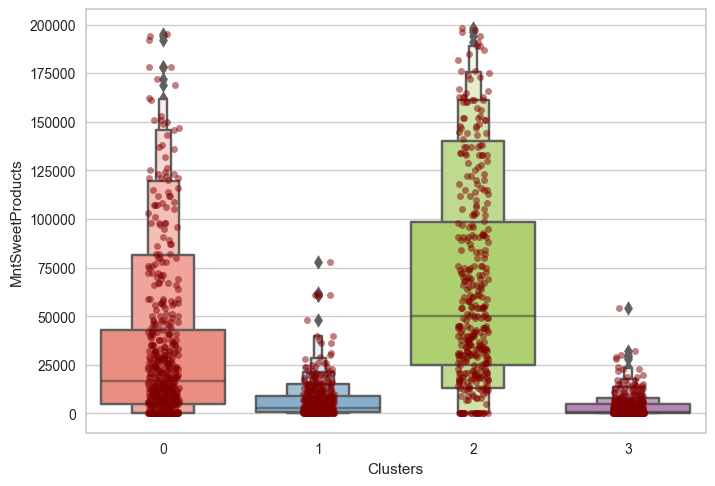

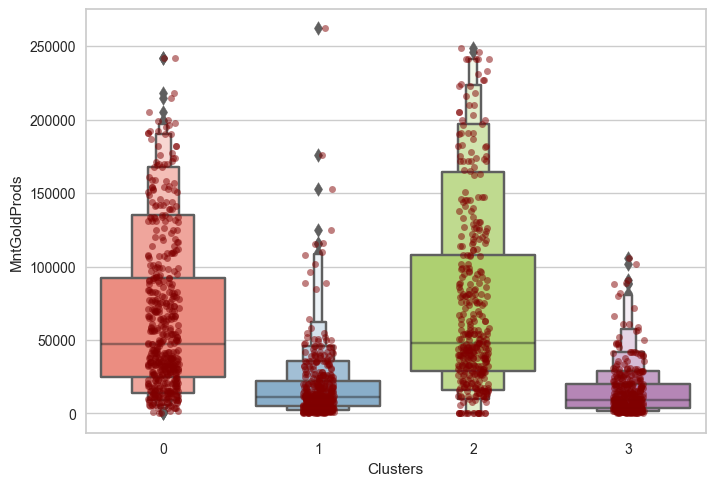

In [124]:

items=['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
for i in items:
    plt.figure()
    p1=sns.stripplot(x=df_train2['Clusters'],y=df_train2[i],color='maroon',alpha=0.5,native_scale=True)
    p1=sns.boxenplot(x=df_train2['Clusters'],y=df_train2[i],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
    plt.show()

## Observations:

#### Total Campaigns

In [125]:
df_train2['Total_Promos']=df_train['AcceptedCmp3']+df_train['AcceptedCmp4']+df_train['AcceptedCmp5']+df_train['AcceptedCmp1']+df_train['AcceptedCmp2']
df_train2

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0           1957          0               0  58138000.0        0         0  \
1           1954          0               0  46344000.0        1         1   
2           1965          0               2  71613000.0        0         0   
3           1984          0               2  26646000.0        1         0   
4           1981          2               3  58293000.0        1         0   
...          ...        ...             ...         ...      ...       ...   
1675        1991          1               2  20193000.0        0         0   
1676        1975          0               3  27573000.0        1         0   
1677        1979          4               0  15862000.0        1         0   
1678        1976          2               3  49544000.0        1         0   
1679        1980          0               3  33228000.0        1         0   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0          58   635000      88000           546000           172000  \
1          38    11000       1000             6000             2000   
2          26   426000      49000           127000           111000   
3          26    11000       4000            20000            10000   
4          94   173000      43000           118000            46000   
...       ...      ...        ...              ...              ...   
1675       18     8000       8000            22000            24000   
1676       45    50000      15000           110000            39000   
1677       26     1000       1000             4000            11000   
1678        0   308000          0            73000                0   
1679       28    22000       2000            31000             7000   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0                88000         88000                  3                8  \
1                 1000          6000                  2                1   
2                21000         42000                  1                8   
3                 3000          5000                  2                2   
4                27000         15000                  5                5   
...                ...           ...                ...              ...   
1675             11000          9000                  1                1   
1676             15000         15000                  4                5   
1677              9000         10000                  1                1   
1678                 0         23000                  2                5   
1679              4000          5000                  1                2   

      NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                      10                  4   66  1617000         0  \
1                       1                  2   69    27000         2   
2                       2                 10   58   776000         0   
3                       0                  4   39    53000         1   
4                       3                  6   42   422000         1   
...                   ...                ...  ...      ...       ...   
1675                    1                  4   32    82000         0   
1676                    1                  4   48   244000         1   
1677                    0                  3   44    36000         1   
1678                    1                  8   47   404000         1   
1679                    0                  3   43    71000         1   

      Family_Size  Is_Parent  Clusters  Total_Promos  
0               1          0         2             0  
1               3          1         3             0  
2               2          0         2             0  
3               3          1         1             0  
4               3          1         0             0  
...           ...        ...       ...           ...  
1675            2          0         1             0 

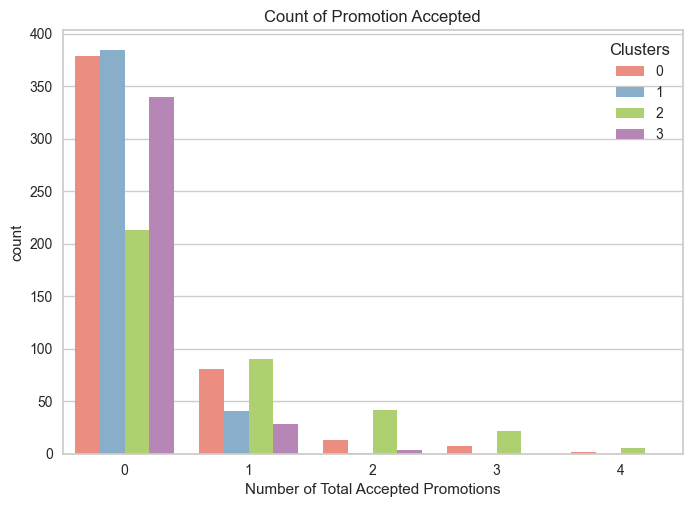

In [126]:
plt.figure()
p1=sns.countplot(x=df_train2['Total_Promos'],hue=df_train2['Clusters'],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
p1.set_title('Count of Promotion Accepted')
p1.set_xlabel('Number of Total Accepted Promotions')
plt.show()


## Observations:
The bar plot shows that the customers didn't show much interest towards the campaigns.

#### Plotting the number of deals purchased


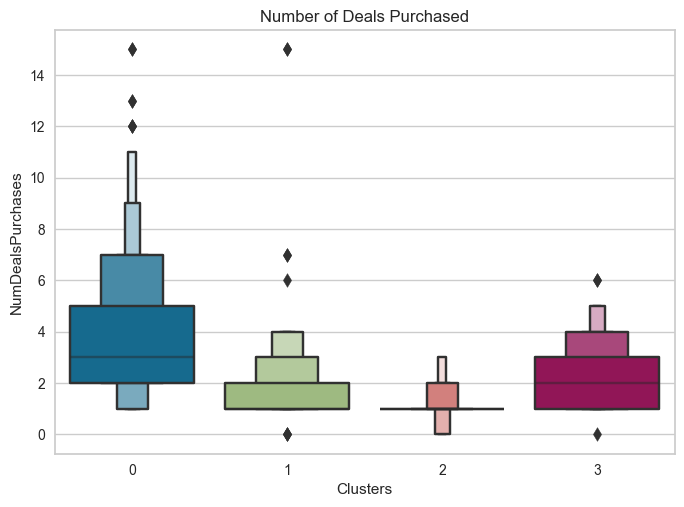

In [127]:
sns.boxenplot(x=df_train2["Clusters"],y=df_train2["NumDealsPurchases"])
plt.title("Number of Deals Purchased")
plt.show()

## Observations:

## TESTING DATASET

## 1.KMeans

In [128]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df_test)
    

score_test = silhouette_score(scaled_df_test, kmeans.labels_, metric='euclidean')
score_test

0.13736410866305857

In [373]:
#### To improve KMeans score adding 'NumWebVisitsMonth' column to the dataset
df_test3=df_test.copy()
#Removing some columns before encoding
df_test3=df_test3.drop(['ID','Living_With','Dt_Customer','Education_Levels','Complain','Response','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Customer_For'],axis=1)
df_test3

Year_Birth  Education Marital_Status      Income  Kidhome  Teenhome   
0          1971  Bachelors        Engaged  38232000.0        1         1  \
1          1955  Doctorate        Married  22554000.0        1         1   
2          1983  Doctorate        Married  23536000.0        1         0   
3          1952  Bachelors        Married  49413000.0        0         1   
4          1969  Bachelors        Married  42231000.0        1         1   
..          ...        ...            ...         ...      ...       ...   
554        1967  Bachelors        Married  61223000.0        0         1   
555        1946  Doctorate        Engaged  64014000.0        2         1   
556        1981  Bachelors       Divorced  56981000.0        0         0   
557        1956    Masters        Engaged  69245000.0        0         1   
558        1954  Doctorate        Married  52869000.0        1         1   

     Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0         84    43000       5000            28000             7000  \
1         38    27000          0            10000                0   
2         53     6000          0             3000                0   
3         88   205000       7000            41000             3000   
4         99    24000          0             8000                0   
..       ...      ...        ...              ...              ...   
554       46   709000      43000           182000            42000   
555       56   406000          0            30000                0   
556       91   908000      48000           217000            32000   
557        8   428000      30000           214000            80000   
558       40    84000       3000            61000             2000   

     MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0                6000         33000                  4                3  \
1                   0          4000                  4                2   
2                   0          1000                  1                0   
3                2000         46000                  2                4   
4                1000          4000                  1                1   
..                ...           ...                ...              ...   
554            118000        247000                  2                9   
555                 0          8000                  7                8   
556             12000         24000                  1                2   
557             30000         61000                  2                6   
558              1000         21000                  3                3   

     NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Age    Spent   
0                      1                  3                  5   52   122000  \
1                      0                  4                  5   68    41000   
2                      0                  3                  3   40    10000   
3                      2                  5                  5   71   304000   
4                      0                  3                  5   54    37000   
..                   ...                ...                ...  ...      ...   
554                    3                  4                  5   56  1341000   
555                    2                  5                  7   77   444000   
556                    3                 13                  6   42  1241000   
557                    5                 10                  3   67   843000   
558                    1                  4                  7   69   172000   

     Children  Family_Size  Is_Parent  
0           2            4          1  
1           2            4          1  
2           1            3          1  
3           1            3          1  
4           2            4          1  
..        ...          ...        ...  
554         1            3          1  
555         3            5          1  
556         0            1   

In [130]:
from sklearn.preprocessing import LabelEncoder

s_df3_test = (df_test3.dtypes == 'object')
object_cols_df3_test = list(s_df3_test[s_df3_test].index)
print("Categorical variables:")
print(object_cols_df3_test)
print('No. of. categorical features: ',
   len(object_cols_df3_test))

Categorical variables:
['Education', 'Marital_Status']
No. of. categorical features:  2


In [131]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc_df3_test=LabelEncoder()
for i in object_cols_df3_test:
    df_test3[i]=df_test3[[i]].apply(labenc_df3_test.fit_transform)
    
df_test3.head()

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0        1971          0               2  38232000.0        1         1  \
1        1955          2               3  22554000.0        1         1   
2        1983          2               3  23536000.0        1         0   
3        1952          0               3  49413000.0        0         1   
4        1969          0               3  42231000.0        1         1   

   Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0       84    43000       5000            28000             7000  \
1       38    27000          0            10000                0   
2       53     6000          0             3000                0   
3       88   205000       7000            41000             3000   
4       99    24000          0             8000                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0              6000         33000                  4                3  \
1                 0          4000                  4                2   
2                 0          1000                  1                0   
3              2000         46000                  2                4   
4              1000          4000                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Age   Spent   
0                    1                  3                  5   52  122000  \
1                    0                  4                  5   68   41000   
2                    0                  3                  3   40   10000   
3                    2                  5                  5   71  304000   
4                    0                  3                  5   54   37000   

   Children  Family_Size  Is_Parent  
0         2            4          1  
1         2            4          1  
2         1            3          1  
3         1            3          1  
4         2            4          1

In [132]:
from sklearn.preprocessing import StandardScaler


scaler_df3_test = StandardScaler()


scaled_data_df3_test = scaler_df3_test.fit_transform(df_test3)
scaled_data_df3_test

array([[ 0.18824063, -0.85000258,  0.05433931, ...,  1.47016986,
         1.61944601,  0.60751733],
       [-1.16931741,  0.69776331,  0.86061711, ...,  1.47016986,
         1.61944601,  0.60751733],
       [ 1.20640916,  0.69776331,  0.86061711, ...,  0.07134273,
         0.47520423,  0.60751733],
       ...,
       [ 1.03671441, -0.85000258, -0.7519385 , ..., -1.3274844 ,
        -1.81327931, -1.64604358],
       [-1.08447004,  1.47164625,  0.05433931, ...,  0.07134273,
         0.47520423,  0.60751733],
       [-1.25416479,  0.69776331,  0.86061711, ...,  1.47016986,
         1.61944601,  0.60751733]])

In [133]:
scaled_df3_test=pd.DataFrame(scaled_data_df3_test)
scaled_df3_test.columns=df_test3.columns
scaled_df3_test.shape

(549, 23)

In [134]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df3_test)

score_test = silhouette_score(scaled_df3_test, kmeans.labels_, metric='euclidean')
score_test

0.15814914993632498

In [135]:
scaled_df3_test

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome   
0      0.188241  -0.850003        0.054339 -0.629737  1.131766  0.894199  \
1     -1.169317   0.697763        0.860617 -1.373984  1.131766  0.894199   
2      1.206409   0.697763        0.860617 -1.327368  1.131766 -1.001227   
3     -1.423860  -0.850003        0.860617 -0.098967 -0.822132  0.894199   
4      0.018546  -0.850003        0.860617 -0.439902  1.131766  0.894199   
..          ...        ...             ...       ...       ...       ...   
544   -0.151149  -0.850003        0.860617  0.461663 -0.822132  0.894199   
545   -1.932944   0.697763        0.054339  0.594153  3.085663  0.894199   
546    1.036714  -0.850003       -0.751939  0.260292 -0.822132 -1.001227   
547   -1.084470   1.471646        0.054339  0.842473 -0.822132  0.894199   
548   -1.254165   0.697763        0.860617  0.065092  1.131766  0.894199   

      Recency   MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0    1.207813 -0.784571  -0.556300        -0.633347        -0.577384  \
1   -0.375972 -0.832828  -0.680208        -0.714256        -0.702308   
2    0.140480 -0.896165  -0.680208        -0.745721        -0.702308   
3    1.345533 -0.295973  -0.506737        -0.574913        -0.648769   
4    1.724264 -0.841876  -0.680208        -0.723246        -0.702308   
..        ...       ...        ...              ...              ...   
544 -0.100531  1.224111   0.385402         0.058877         0.047232   
545  0.243770  0.310251  -0.680208        -0.624357        -0.702308   
546  1.448823  1.824303   0.509310         0.216200        -0.131230   
547 -1.408875  0.376604   0.063241         0.202715         0.725388   
548 -0.307111 -0.660914  -0.605863        -0.485013        -0.666615   

     MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0           -0.528461     -0.238822           0.941360        -0.407435  \
1           -0.681575     -0.770908           0.941360        -0.748934   
2           -0.681575     -0.825951          -0.706270        -1.431932   
3           -0.630537     -0.000301          -0.157060        -0.065936   
4           -0.656056     -0.770908          -0.706270        -1.090433   
..                ...           ...                ...              ...   
544          2.329664      3.687606          -0.157060         1.641559   
545         -0.681575     -0.697517           2.588989         1.300060   
546         -0.375347     -0.403952          -0.706270        -0.748934   
547          0.083994      0.274916          -0.157060         0.617062   
548         -0.656056     -0.458996           0.392150        -0.407435   

     NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age   
0              -0.595710          -0.869895          -0.128754 -0.188241  \
1              -0.959903          -0.562972          -0.128754  1.169317   
2              -0.959903          -0.869895          -0.985551 -1.206409   
3              -0.231518          -0.256049          -0.128754  1.423860   
4              -0.959903          -0.869895          -0.128754 -0.018546   
..                   ...                ...                ...       ...   
544             0.132675          -0.562972          -0.128754  0.151149   
545            -0.231518          -0.256049           0.728044  1.932944   
546             0.132675           2.199336           0.299645 -1.036714   
547             0.861060           1.278567          -0.985551  1.084470   
548            -0.595710          -0.562972           0.728044  1.254165   

        Spent  Children  Family_Size  Is_Parent  
0   -0.811787  1.470170     1.619446   0.607517  
1   -0.946100  1.470170     1.619446   0.607517  
2   -0.997504  0.071343     0.475204   0.607517  
3   -0.509995  0.071343     0.475204   0.607517  
4   -0.952733  1.470170     1.619446   0.607517  
..        ...       ...          ...        ...  
544  1.209550  0.071343     0.475204   0.607517  
545 -0.277848

#### What I have done here is when the 'NumWebVisitsMonth' column is removed from the dataset the score of KMeans model were 0.13736410866305857.To improve this score I included the above mentioned column and obtained a score of 0.15814914993632498

#### Dimensionality Reduction using PCA

In [136]:
from sklearn.decomposition import PCA
pca_test=PCA(n_components=3)
pca.fit_transform(scaled_df_test)

array([[-3.02885574,  1.11506938,  1.23946804],
       [-3.60231668,  1.82317723, -0.8918709 ],
       [-3.06048071, -2.23972516,  0.56077073],
       ...,
       [ 2.82442498, -2.41425256,  0.11765581],
       [ 1.36666626,  2.09384909, -1.09395917],
       [-2.68986773,  2.13319748, -0.91015945]])

In [137]:
pca_df_test=pd.DataFrame(pca.fit_transform(scaled_df_test),columns=(['col1','col2','col3']))
pca_df_test

col1      col2      col3
0   -3.028854  1.115053  1.240032
1   -3.602315  1.823170 -0.891477
2   -3.060482 -2.239702  0.559952
3   -1.031934  1.693250 -1.526223
4   -3.329923  0.606340  0.414931
..        ...       ...       ...
544  2.352015  2.194582  1.521928
545 -2.959569  4.610795  0.281470
546  2.824428 -2.414220  0.116938
547  1.366663  2.093845 -1.094668
548 -2.689863  2.133174 -0.909730

[549 rows x 3 columns]

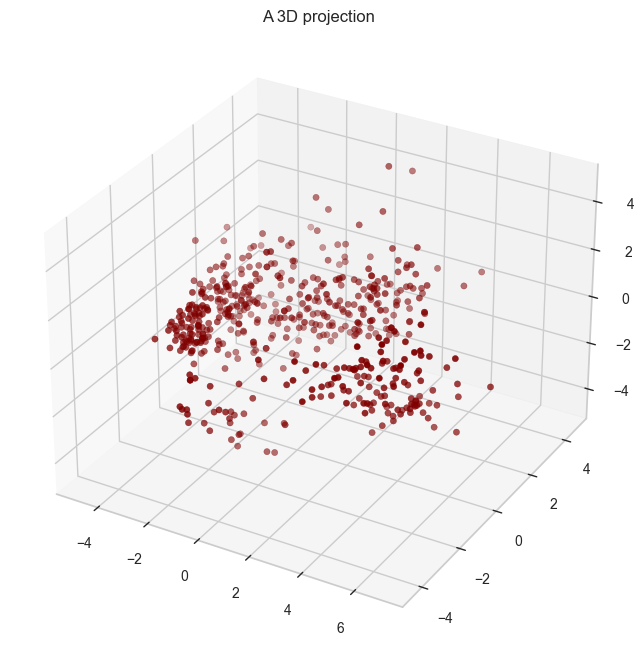

In [138]:
x=pca_df_test['col1']
y=pca_df_test['col2']
z=pca_df_test['col3']
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='maroon',marker='o')
ax.set_title('A 3D projection')
plt.show()

In [139]:
score_test = silhouette_score(pca_df_test, kmeans.labels_, metric='euclidean')
score_test

0.25735198043669233

#### Elbow Plot

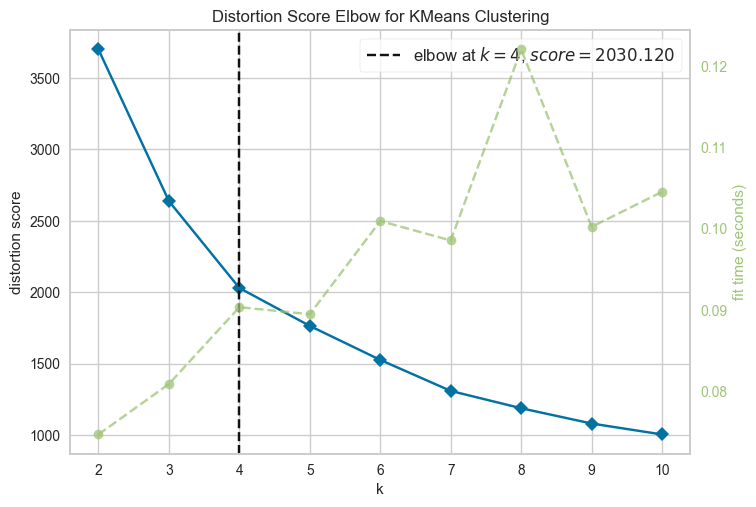

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [140]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M_test=KElbowVisualizer(KMeans(),k=10)
Elbow_M_test.fit(pca_df_test)
Elbow_M_test.show()

## AGGLOMERATIVE CLUSTERING

In [141]:
AC=AgglomerativeClustering(n_clusters=4)
yhat_AC_test=AC.fit_predict(pca_df_test)
pca_df_test['Clusters'] = yhat_AC_test
df_test2['Clusters']=yhat_AC_test
df_test2

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0          1971          0               2  38232000.0        1         1  \
1          1955          2               3  22554000.0        1         1   
2          1983          2               3  23536000.0        1         0   
3          1952          0               3  49413000.0        0         1   
4          1969          0               3  42231000.0        1         1   
..          ...        ...             ...         ...      ...       ...   
554        1967          0               3  61223000.0        0         1   
555        1946          2               2  64014000.0        2         1   
556        1981          0               1  56981000.0        0         0   
557        1956          3               2  69245000.0        0         1   
558        1954          2               3  52869000.0        1         1   

     Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0         84    43000       5000            28000             7000  \
1         38    27000          0            10000                0   
2         53     6000          0             3000                0   
3         88   205000       7000            41000             3000   
4         99    24000          0             8000                0   
..       ...      ...        ...              ...              ...   
554       46   709000      43000           182000            42000   
555       56   406000          0            30000                0   
556       91   908000      48000           217000            32000   
557        8   428000      30000           214000            80000   
558       40    84000       3000            61000             2000   

     MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0                6000         33000                  4                3  \
1                   0          4000                  4                2   
2                   0          1000                  1                0   
3                2000         46000                  2                4   
4                1000          4000                  1                1   
..                ...           ...                ...              ...   
554            118000        247000                  2                9   
555                 0          8000                  7                8   
556             12000         24000                  1                2   
557             30000         61000                  2                6   
558              1000         21000                  3                3   

     NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                      1                  3   52   122000         2  \
1                      0                  4   68    41000         2   
2                      0                  3   40    10000         1   
3                      2                  5   71   304000         1   
4                      0                  3   54    37000         2   
..                   ...                ...  ...      ...       ...   
554                    3                  4   56  1341000         1   
555                    2                  5   77   444000         3   
556                    3                 13   42  1241000         0   
557                    5                 10   67   843000         1   
558                    1                  4   69   172000         2   

     Family_Size  Is_Parent  Clusters  
0              4          1         3  
1              4          1         3  
2              3          1         0  
3              3          1         3  
4              4          1         3  
..           ...        ...       ...  
554            3          1         2  
555            5          1         3  
556            1          0         1  
557            3          1         2  
558            4          1         3  

[549

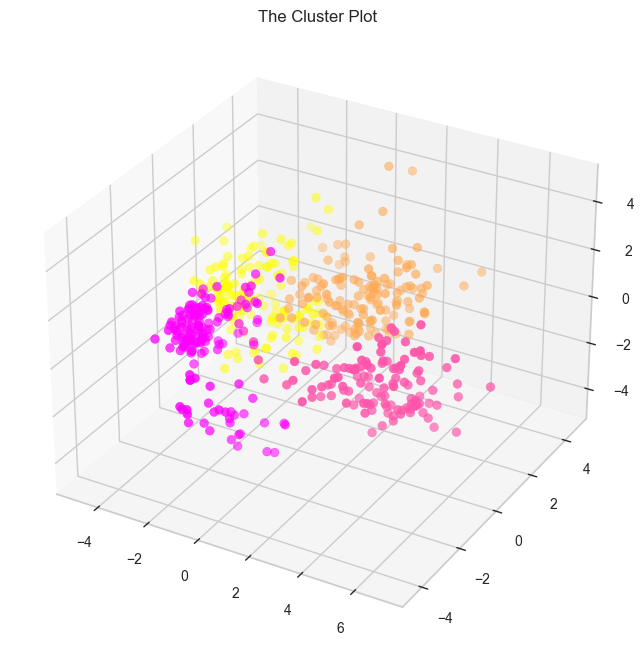

In [142]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=pca_df_test['Clusters'],marker='o',cmap='spring')
ax.set_title('The Cluster Plot')
plt.show()

## EDA on Clusters

#### DISTRIBUTION OF CLUSTERS

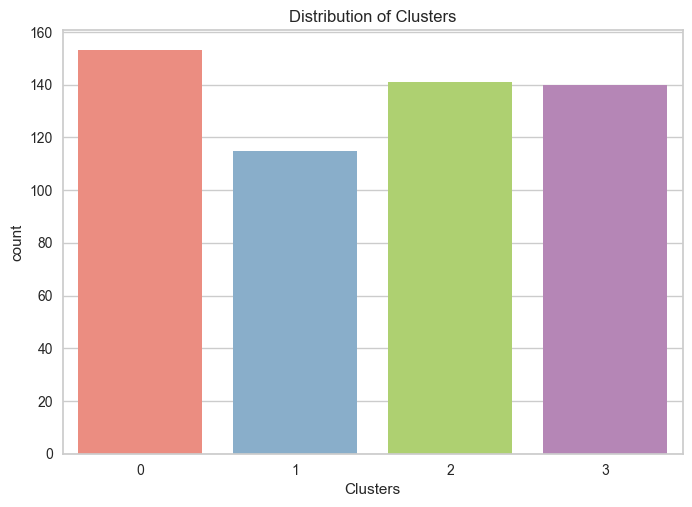

In [143]:
pl=sns.countplot(x=df_test2['Clusters'],palette=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe"])
pl.set_title('Distribution of Clusters')
plt.show()

#### CORRELATION OF INCOME AND APENDING AS CLUSTER AS HUE

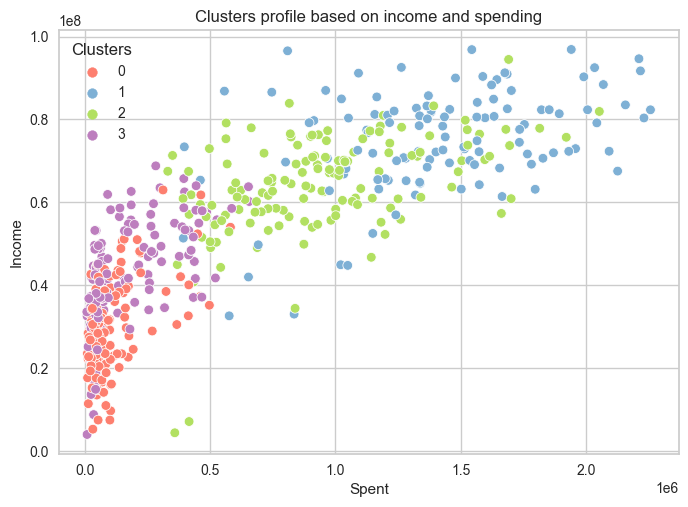

In [144]:
p1=sns.scatterplot(data=df_test2,x=df_test2['Spent'],y=df_test2['Income'],hue=df_test2['Clusters'],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
p1.set_title('Clusters profile based on income and spending')

plt.show()

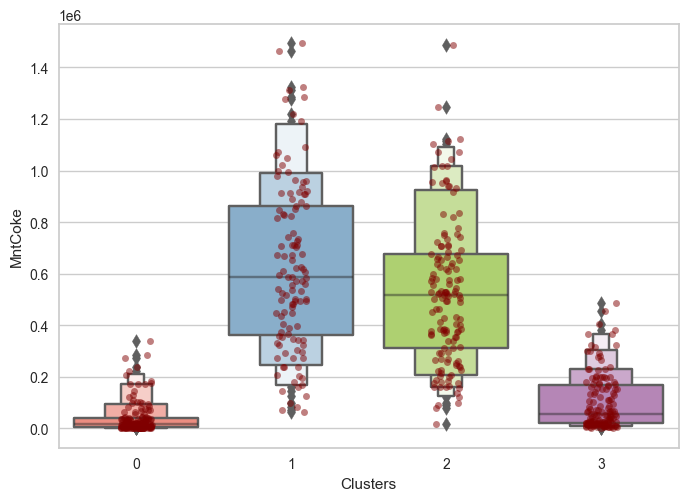

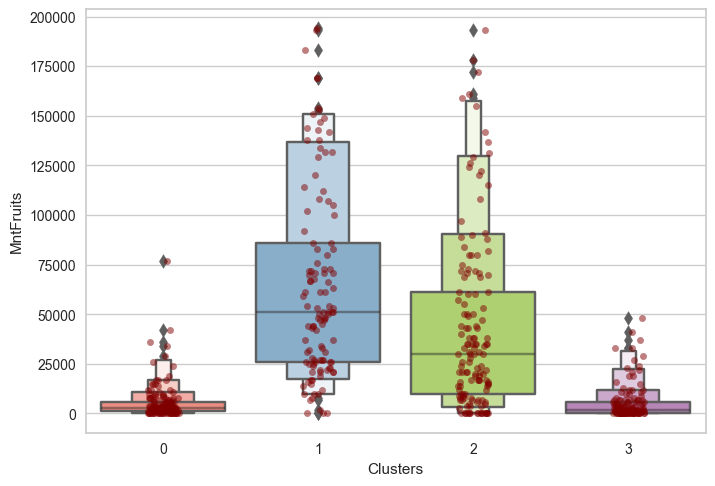

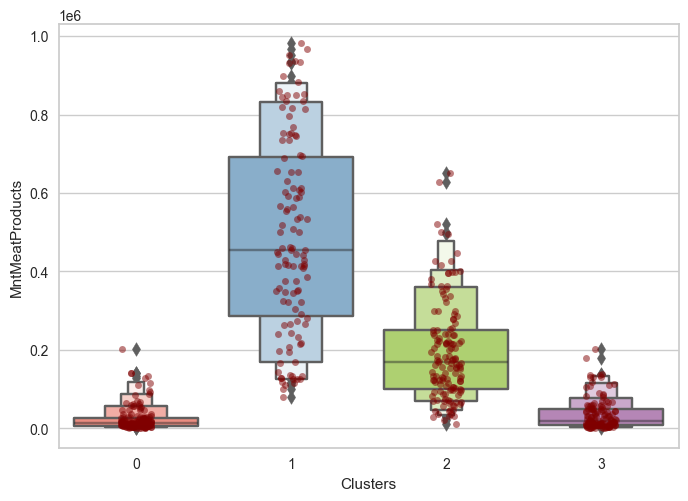

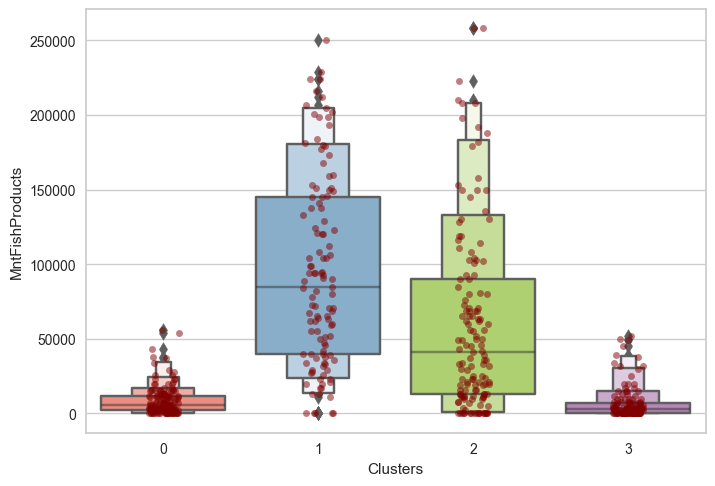

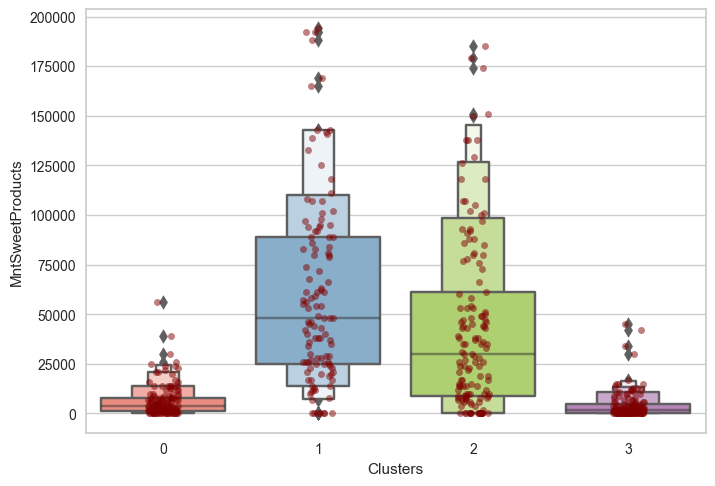

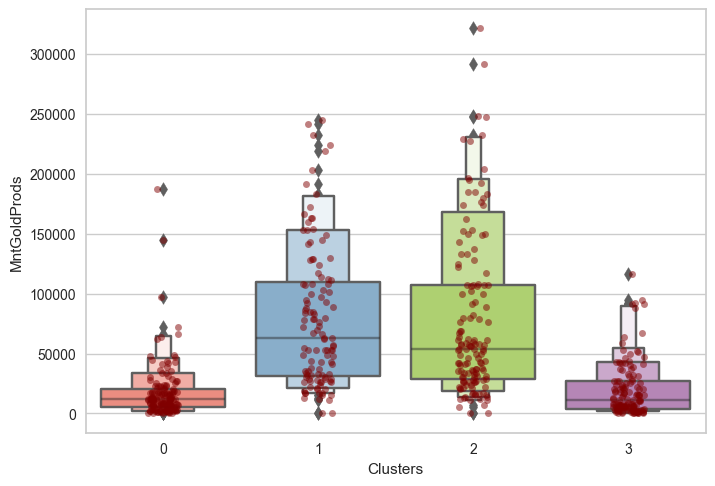

In [145]:
items_test=['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
for i in items_test:
    plt.figure()
    p1=sns.stripplot(x=df_test2['Clusters'],y=df_test2[i],color='maroon',alpha=0.5,native_scale=True)
    p1=sns.boxenplot(x=df_test2['Clusters'],y=df_test2[i],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
    plt.show()

In [146]:
df_test2['Total_Promos']=df_test['AcceptedCmp3']+df_test['AcceptedCmp4']+df_test['AcceptedCmp5']+df_test['AcceptedCmp1']+df_test['AcceptedCmp2']
df_test2

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0          1971          0               2  38232000.0        1         1  \
1          1955          2               3  22554000.0        1         1   
2          1983          2               3  23536000.0        1         0   
3          1952          0               3  49413000.0        0         1   
4          1969          0               3  42231000.0        1         1   
..          ...        ...             ...         ...      ...       ...   
554        1967          0               3  61223000.0        0         1   
555        1946          2               2  64014000.0        2         1   
556        1981          0               1  56981000.0        0         0   
557        1956          3               2  69245000.0        0         1   
558        1954          2               3  52869000.0        1         1   

     Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0         84    43000       5000            28000             7000  \
1         38    27000          0            10000                0   
2         53     6000          0             3000                0   
3         88   205000       7000            41000             3000   
4         99    24000          0             8000                0   
..       ...      ...        ...              ...              ...   
554       46   709000      43000           182000            42000   
555       56   406000          0            30000                0   
556       91   908000      48000           217000            32000   
557        8   428000      30000           214000            80000   
558       40    84000       3000            61000             2000   

     MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0                6000         33000                  4                3  \
1                   0          4000                  4                2   
2                   0          1000                  1                0   
3                2000         46000                  2                4   
4                1000          4000                  1                1   
..                ...           ...                ...              ...   
554            118000        247000                  2                9   
555                 0          8000                  7                8   
556             12000         24000                  1                2   
557             30000         61000                  2                6   
558              1000         21000                  3                3   

     NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                      1                  3   52   122000         2  \
1                      0                  4   68    41000         2   
2                      0                  3   40    10000         1   
3                      2                  5   71   304000         1   
4                      0                  3   54    37000         2   
..                   ...                ...  ...      ...       ...   
554                    3                  4   56  1341000         1   
555                    2                  5   77   444000         3   
556                    3                 13   42  1241000         0   
557                    5                 10   67   843000         1   
558                    1                  4   69   172000         2   

     Family_Size  Is_Parent  Clusters  Total_Promos  
0              4          1         3             0  
1              4          1         3             0  
2              3          1         0             0  
3              3          1         3             0  
4              4          1         3             0  
..           ...        ...       ...           ...  
554            3          1         2             0  
555            5          1         3             1  

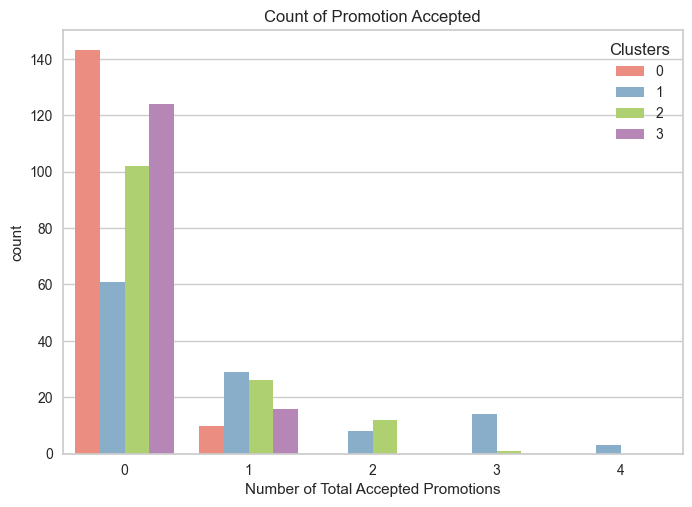

In [147]:
plt.figure()
p1=sns.countplot(x=df_test2['Total_Promos'],hue=df_test2['Clusters'],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
p1.set_title('Count of Promotion Accepted')
p1.set_xlabel('Number of Total Accepted Promotions')
plt.show()


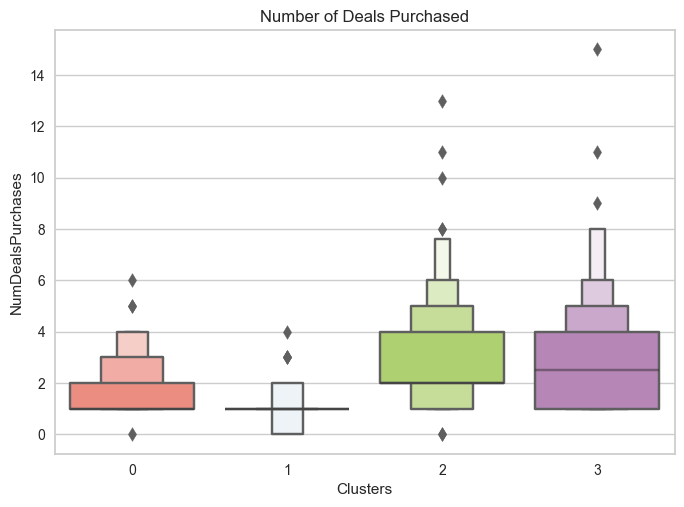

In [148]:
#Plotting the number of deals purchased


plt.figure()
sns.boxenplot(x=df_test2["Clusters"],y=df_test2["NumDealsPurchases"],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
plt.title("Number of Deals Purchased")
plt.show()

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">9.Profiling</p>

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

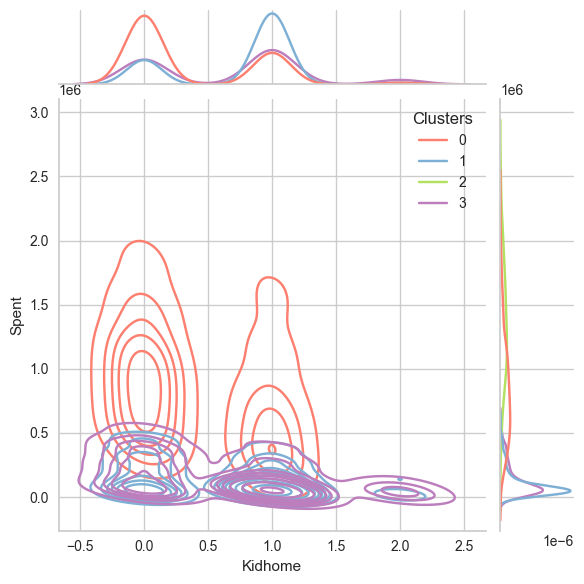

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

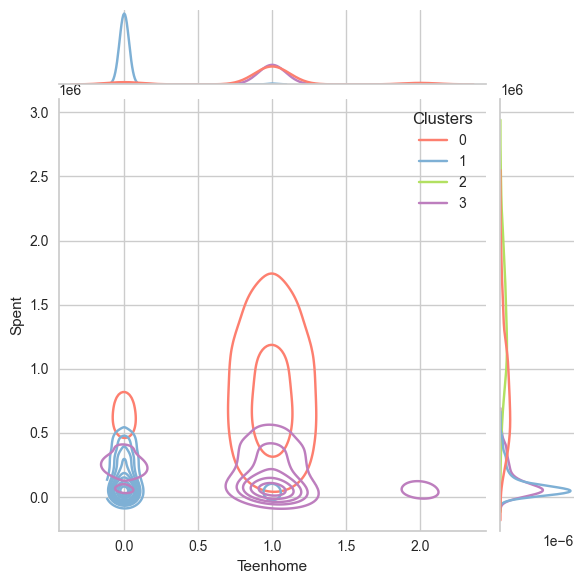

<Figure size 800x550 with 0 Axes>

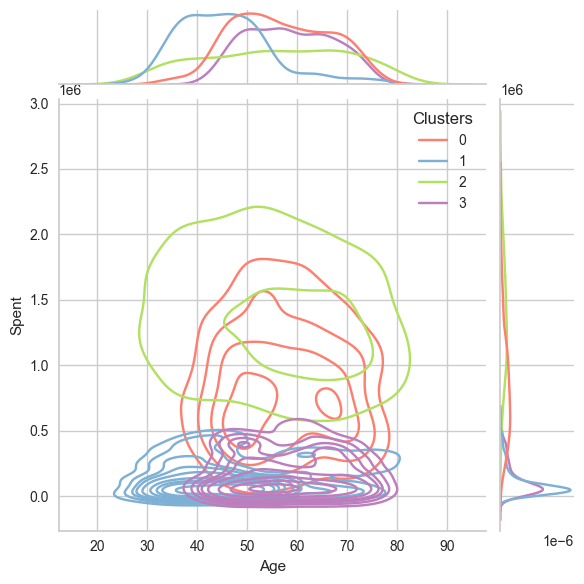

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

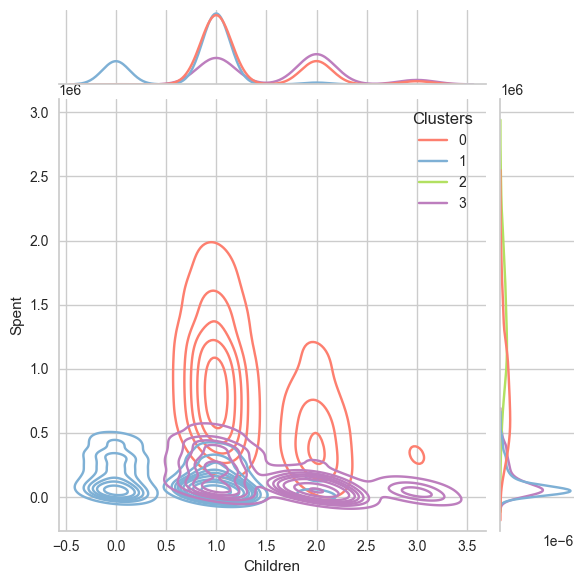

<Figure size 800x550 with 0 Axes>

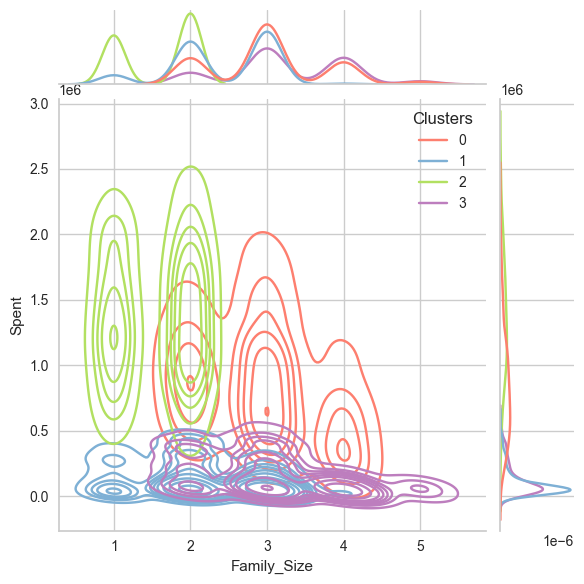

<Figure size 800x550 with 0 Axes>

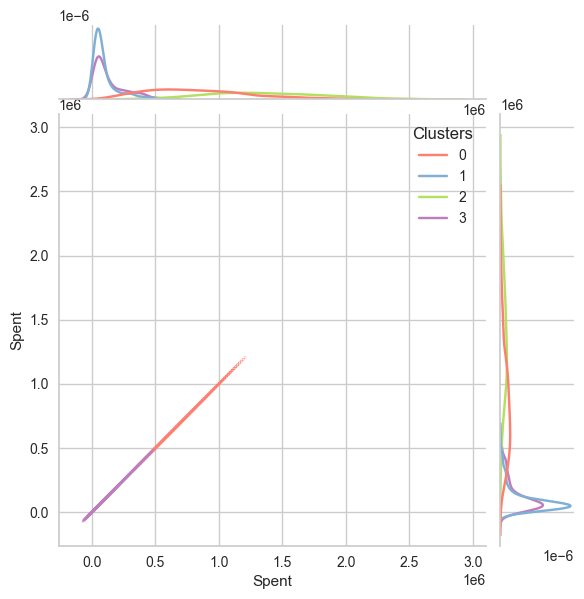

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

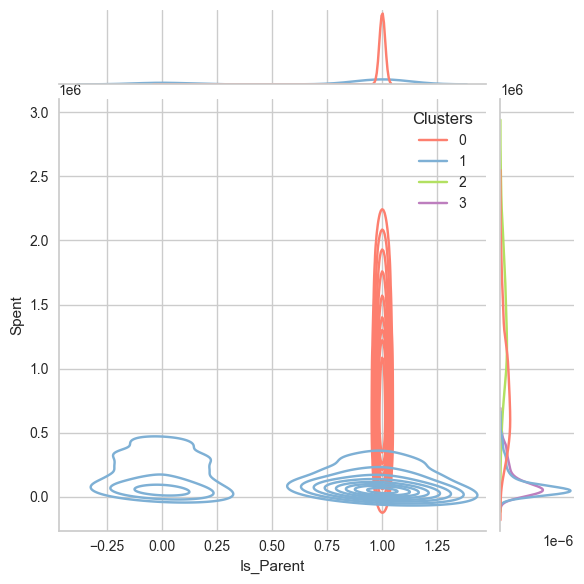

<Figure size 800x550 with 0 Axes>

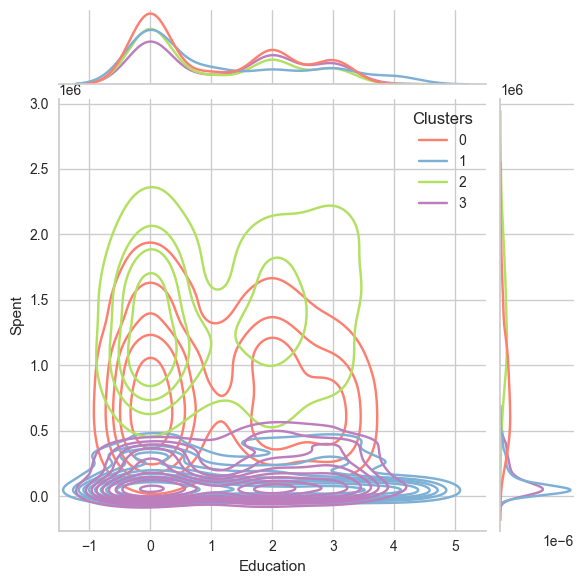

<Figure size 800x550 with 0 Axes>

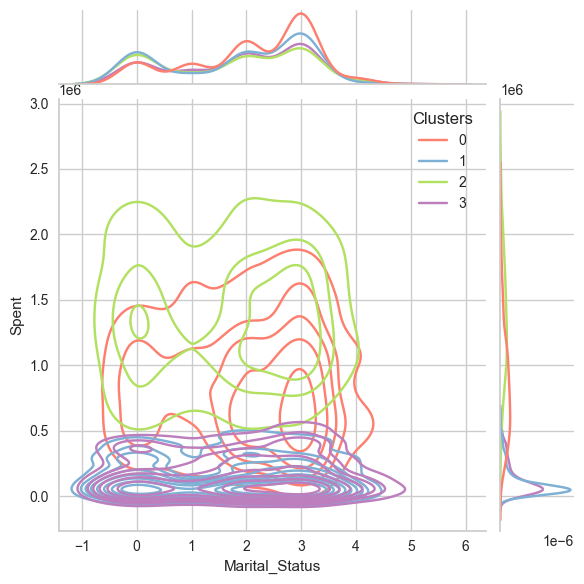

<Figure size 800x550 with 0 Axes>

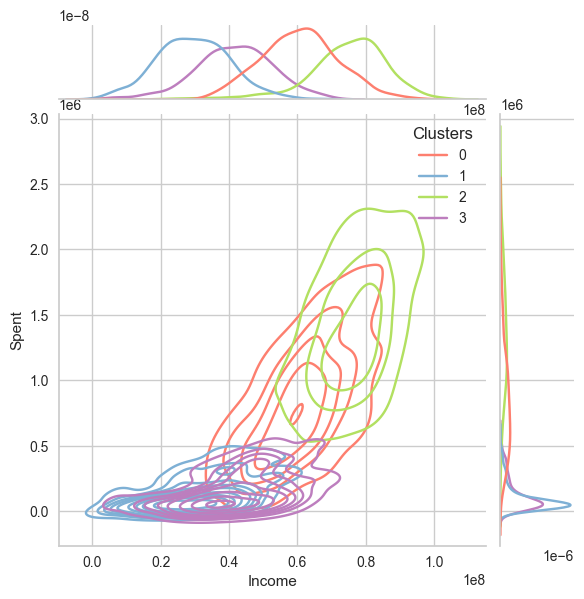

In [794]:
Personal = [ "Kidhome","Teenhome","Age", "Children", "Family_Size", "Spent","Is_Parent", "Education","Marital_Status","Income"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df_train2[i], y=df_train2["Spent"], hue =df_train2["Clusters"], kind="kde",palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
    plt.show()


### Observations:


Cluster 0:

    Characteristics:
        
        * Definitely a parent.
        * Age range between 30-80.
        * Maximum of 4 members in the family.
        * More than 1 child at home.
        * Medium salary.

Cluster 1:

    Characteristics:
        
        * At most 1 kid in the family.
        * Age range between 30-60.
        * Either a parent of 1 kid or not parents.
        * Maximum of 3 members in the family.
        * Lowest salary.

Cluster 2:

    Characteristics:
        
        * Not a parent.
        * Includes individuals of all age groups.
        * Maximum of two members in the family.
        * Highest salary.

Cluster 3:

    Characteristics:
        
        * Have at least 1 child.
        * 2, 3, or 4 members in the family.
        * Age range between 40-80.
        * Average salary.

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">10.Classification Algorithm</p>

In [150]:
scaled_df3


Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome   
0      -1.023870  -0.897459       -1.581210  0.321793 -0.826149 -0.910858  \
1      -1.280900  -0.897459       -1.581210 -0.254367  1.008257  0.908655   
2      -0.338455  -0.897459        0.061141  0.980072 -0.826149 -0.910858   
3       1.289406  -0.897459        0.061141 -1.216653  1.008257 -0.910858   
4       1.032375   0.702760        0.882316  0.329365  1.008257 -0.910858   
...          ...        ...             ...       ...       ...       ...   
1647    1.889144  -0.097350        0.061141 -1.531894 -0.826149 -0.910858   
1648    0.518314  -0.897459        0.882316 -1.171367  1.008257 -0.910858   
1649    0.861022   2.302978       -1.581210 -1.743472  1.008257 -0.910858   
1650    0.603991   0.702760        0.882316 -0.098041  1.008257 -0.910858   
1651    0.946698  -0.897459        0.882316 -0.895109  1.008257 -0.910858   

       Recency   MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0     0.308238  0.967993   1.583179         1.768383         2.484299  \
1    -0.384234 -0.872319  -0.632969        -0.730665        -0.647068   
2    -0.799718  0.351607   0.589733        -0.170693         1.360691   
3    -0.799718 -0.872319  -0.556550        -0.665875        -0.499710   
4     1.554689 -0.394545   0.436895        -0.212344         0.163403   
...        ...       ...        ...              ...              ...   
1647 -1.076707 -0.881167  -0.454659        -0.656619        -0.241832   
1648 -0.141869 -0.757299  -0.276348        -0.249367         0.034465   
1649 -0.799718 -0.901811  -0.632969        -0.739921        -0.481290   
1650 -1.699932  0.003599  -0.658442        -0.420598        -0.683908   
1651 -0.730471 -0.839877  -0.607496        -0.614969        -0.554969   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             1.480826      0.885096           0.349557         1.513322  \
1            -0.631046     -0.736493          -0.174937        -1.169501   
2            -0.145558     -0.024576          -0.699431         1.513322   
3            -0.582497     -0.756268          -0.174937        -0.786240   
4             0.000088     -0.558513           1.398545         0.363541   
...                ...           ...                ...              ...   
1647         -0.388302     -0.677166          -0.699431        -1.169501   
1648         -0.291204     -0.558513           0.874051         0.363541   
1649         -0.436851     -0.657391          -0.699431        -1.169501   
1650         -0.655320     -0.400310          -0.174937         0.363541   
1651         -0.558223     -0.756268          -0.699431        -0.786240   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age   
0                2.624855          -0.562301           0.674592  1.023870  \
1               -0.584284          -1.182201          -0.146348  1.280900   
2               -0.227713           1.297401          -0.556818  0.338455   
3               -0.940855          -0.562301           0.264122 -1.289406   
4                0.128858           0.057600          -0.146348 -1.032375   
...                   ...                ...                ...       ...   
1647            -0.584284          -0.562301          -0.556818 -1.889144   
1648            -0.584284          -0.562301           1.085062 -0.518314   
1649            -0.940855          -0.872251           1.085062 -0.861022   
1650            -0.584284           0.677500           0.674592 -0.603991   
1651            -0.940855          -0.872251           0.674592 -0.946698   

         Spent  Children  Family_Size  Is_Parent  
0     1.687226 -1.252040    -1.746815  -1.571810  
1    -0.960723  1.381149     0.437696   0.636209  
2     0.286644 -1.252040    -0.654560  -1.571810  
3    -0.917423  0.064555     0.437696   0.636209  
4    -0.302899  0.064555     0.437696   0.636209  
...        ...       ...          ...        ...  
1647 -0.8

In [768]:
df_train4=df_train.copy()
#Removing some columns before encoding
df_train4=df_train4.drop(['ID','Living_With','Dt_Customer','Education_Levels','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response','Customer_For'],axis=1)

df_train4

Year_Birth    Education Marital_Status      Income  Kidhome  Teenhome   
0           1957    Bachelors       Bachelor  58138000.0        0         0  \
1           1954    Bachelors       Bachelor  46344000.0        1         1   
2           1965    Bachelors        Engaged  71613000.0        0         0   
3           1984    Bachelors        Engaged  26646000.0        1         0   
4           1981    Doctorate        Married  58293000.0        1         0   
...          ...          ...            ...         ...      ...       ...   
1675        1991      Diploma        Engaged  20193000.0        0         0   
1676        1975    Bachelors        Married  27573000.0        1         0   
1677        1979  Senior High       Bachelor  15862000.0        1         0   
1678        1976    Doctorate        Married  49544000.0        1         0   
1679        1980    Bachelors        Married  33228000.0        1         0   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0          58   635000      88000           546000           172000  \
1          38    11000       1000             6000             2000   
2          26   426000      49000           127000           111000   
3          26    11000       4000            20000            10000   
4          94   173000      43000           118000            46000   
...       ...      ...        ...              ...              ...   
1675       18     8000       8000            22000            24000   
1676       45    50000      15000           110000            39000   
1677       26     1000       1000             4000            11000   
1678        0   308000          0            73000                0   
1679       28    22000       2000            31000             7000   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0                88000         88000                  3                8  \
1                 1000          6000                  2                1   
2                21000         42000                  1                8   
3                 3000          5000                  2                2   
4                27000         15000                  5                5   
...                ...           ...                ...              ...   
1675             11000          9000                  1                1   
1676             15000         15000                  4                5   
1677              9000         10000                  1                1   
1678                 0         23000                  2                5   
1679              4000          5000                  1                2   

      NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                      10                  4   66  1617000         0  \
1                       1                  2   69    27000         2   
2                       2                 10   58   776000         0   
3                       0                  4   39    53000         1   
4                       3                  6   42   422000         1   
...                   ...                ...  ...      ...       ...   
1675                    1                  4   32    82000         0   
1676                    1                  4   48   244000         1   
1677                    0                  3   44    36000         1   
1678                    1                  8   47   404000         1   
1679                    0                  3   43    71000         1   

      Family_Size  Is_Parent  
0               1          0  
1               3          1  
2               2          0  
3               3          1  
4               3          1  
...           ...        ...  
1675            2          0  
1676            3          1  
1677            2          1  
1678            3          1  
1679            3          1  

[1652 rows x 22 columns]

In [769]:
df_train4.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Age                    0
Spent                  0
Children               0
Family_Size            0
Is_Parent              0
dtype: int64

In [770]:
from sklearn.preprocessing import LabelEncoder

s_df4 = (df_train4.dtypes == 'object')
object_cols_df4 = list(s_df4[s_df4].index)
print("Categorical variables:")
print(object_cols_df4)
print('No. of. categorical features: ',
   len(object_cols_df4))

Categorical variables:
['Education', 'Marital_Status']
No. of. categorical features:  2


In [771]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc_df4=LabelEncoder()
for i in object_cols_df4:
    df_train4[i]=df_train4[[i]].apply(labenc_df4.fit_transform)
    
df_train4.head()

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0        1957          0               0  58138000.0        0         0  \
1        1954          0               0  46344000.0        1         1   
2        1965          0               2  71613000.0        0         0   
3        1984          0               2  26646000.0        1         0   
4        1981          2               3  58293000.0        1         0   

   Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0       58   635000      88000           546000           172000  \
1       38    11000       1000             6000             2000   
2       26   426000      49000           127000           111000   
3       26    11000       4000            20000            10000   
4       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0             88000         88000                  3                8  \
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                   10                  4   66  1617000         0  \
1                    1                  2   69    27000         2   
2                    2                 10   58   776000         0   
3                    0                  4   39    53000         1   
4                    3                  6   42   422000         1   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1

In [772]:
from sklearn.preprocessing import StandardScaler


scaler_df4 = StandardScaler()


scaled_data_df4 = scaler_df4.fit_transform(df_train4)
scaled_data_df4

array([[-1.02386985, -0.89745927, -1.58121021, ..., -1.25204008,
        -1.74681513, -1.5718105 ],
       [-1.2809005 , -0.89745927, -1.58121021, ...,  1.38114924,
         0.43769554,  0.63620901],
       [-0.3384548 , -0.89745927,  0.06114079, ..., -1.25204008,
        -0.6545598 , -1.5718105 ],
       ...,
       [ 0.86102154,  2.30297832, -1.58121021, ...,  0.06455458,
        -0.6545598 ,  0.63620901],
       [ 0.6039909 ,  0.70275953,  0.88231629, ...,  0.06455458,
         0.43769554,  0.63620901],
       [ 0.94669842, -0.89745927,  0.88231629, ...,  0.06455458,
         0.43769554,  0.63620901]])

In [773]:
scaled_df4=pd.DataFrame(scaled_data_df4)
scaled_df4.columns=df_train4.columns
scaled_df4.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Age                    0
Spent                  0
Children               0
Family_Size            0
Is_Parent              0
dtype: int64

In [774]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df4)

score_df4 = silhouette_score(scaled_df4, kmeans.labels_, metric='euclidean')
score_df4

0.13774443237728684

In [775]:
scaled_df4['Clusters']=df_train2['Clusters']
scaled_df4.shape

(1652, 23)

In [776]:
scaled_df4.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
Age                     0
Spent                   0
Children                0
Family_Size             0
Is_Parent               0
Clusters               27
dtype: int64

In [777]:
scaled_df4=scaled_df4.dropna()

scaled_df4.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Age                    0
Spent                  0
Children               0
Family_Size            0
Is_Parent              0
Clusters               0
dtype: int64

In [778]:
#### To improve KMeans score adding 'NumWebVisitsMonth' column to the dataset
df_test4=df_test.copy()
#Removing some columns before encoding
df_test4=df_test4.drop(['ID','Living_With','Dt_Customer','Education_Levels','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response','Customer_For'],axis=1)

df_test4

Year_Birth  Education Marital_Status      Income  Kidhome  Teenhome   
0          1971  Bachelors        Engaged  38232000.0        1         1  \
1          1955  Doctorate        Married  22554000.0        1         1   
2          1983  Doctorate        Married  23536000.0        1         0   
3          1952  Bachelors        Married  49413000.0        0         1   
4          1969  Bachelors        Married  42231000.0        1         1   
..          ...        ...            ...         ...      ...       ...   
554        1967  Bachelors        Married  61223000.0        0         1   
555        1946  Doctorate        Engaged  64014000.0        2         1   
556        1981  Bachelors       Divorced  56981000.0        0         0   
557        1956    Masters        Engaged  69245000.0        0         1   
558        1954  Doctorate        Married  52869000.0        1         1   

     Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0         84    43000       5000            28000             7000  \
1         38    27000          0            10000                0   
2         53     6000          0             3000                0   
3         88   205000       7000            41000             3000   
4         99    24000          0             8000                0   
..       ...      ...        ...              ...              ...   
554       46   709000      43000           182000            42000   
555       56   406000          0            30000                0   
556       91   908000      48000           217000            32000   
557        8   428000      30000           214000            80000   
558       40    84000       3000            61000             2000   

     MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0                6000         33000                  4                3  \
1                   0          4000                  4                2   
2                   0          1000                  1                0   
3                2000         46000                  2                4   
4                1000          4000                  1                1   
..                ...           ...                ...              ...   
554            118000        247000                  2                9   
555                 0          8000                  7                8   
556             12000         24000                  1                2   
557             30000         61000                  2                6   
558              1000         21000                  3                3   

     NumCatalogPurchases  NumStorePurchases  Age    Spent  Children   
0                      1                  3   52   122000         2  \
1                      0                  4   68    41000         2   
2                      0                  3   40    10000         1   
3                      2                  5   71   304000         1   
4                      0                  3   54    37000         2   
..                   ...                ...  ...      ...       ...   
554                    3                  4   56  1341000         1   
555                    2                  5   77   444000         3   
556                    3                 13   42  1241000         0   
557                    5                 10   67   843000         1   
558                    1                  4   69   172000         2   

     Family_Size  Is_Parent  
0              4          1  
1              4          1  
2              3          1  
3              3          1  
4              4          1  
..           ...        ...  
554            3          1  
555            5          1  
556            1          0  
557            3          1  
558            4          1  

[549 rows x 22 columns]

In [779]:
df_test2['Clusters']

0      3
1      3
2      0
3      3
4      3
      ..
554    2
555    3
556    1
557    2
558    3
Name: Clusters, Length: 549, dtype: int64

In [780]:
from sklearn.preprocessing import LabelEncoder

s_df4_test = (df_test4.dtypes == 'object')
object_cols_df4_test = list(s_df4_test[s_df4_test].index)
print("Categorical variables:")
print(object_cols_df4_test)
print('No. of. categorical features: ',
   len(object_cols_df4_test))

Categorical variables:
['Education', 'Marital_Status']
No. of. categorical features:  2


In [781]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc_df4_test=LabelEncoder()
for i in object_cols_df4_test:
    df_test4[i]=df_test4[[i]].apply(labenc_df4_test.fit_transform)
    
df_test4.head()

Year_Birth  Education  Marital_Status      Income  Kidhome  Teenhome   
0        1971          0               2  38232000.0        1         1  \
1        1955          2               3  22554000.0        1         1   
2        1983          2               3  23536000.0        1         0   
3        1952          0               3  49413000.0        0         1   
4        1969          0               3  42231000.0        1         1   

   Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts   
0       84    43000       5000            28000             7000  \
1       38    27000          0            10000                0   
2       53     6000          0             3000                0   
3       88   205000       7000            41000             3000   
4       99    24000          0             8000                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases   
0              6000         33000                  4                3  \
1                 0          4000                  4                2   
2                 0          1000                  1                0   
3              2000         46000                  2                4   
4              1000          4000                  1                1   

   NumCatalogPurchases  NumStorePurchases  Age   Spent  Children  Family_Size   
0                    1                  3   52  122000         2            4  \
1                    0                  4   68   41000         2            4   
2                    0                  3   40   10000         1            3   
3                    2                  5   71  304000         1            3   
4                    0                  3   54   37000         2            4   

   Is_Parent  
0          1  
1          1  
2          1  
3          1  
4          1

In [782]:
from sklearn.preprocessing import StandardScaler


scaler_df4_test = StandardScaler()


scaled_data_df4_test = scaler_df4_test.fit_transform(df_test4)
scaled_data_df4_test

array([[ 0.18824063, -0.85000258,  0.05433931, ...,  1.47016986,
         1.61944601,  0.60751733],
       [-1.16931741,  0.69776331,  0.86061711, ...,  1.47016986,
         1.61944601,  0.60751733],
       [ 1.20640916,  0.69776331,  0.86061711, ...,  0.07134273,
         0.47520423,  0.60751733],
       ...,
       [ 1.03671441, -0.85000258, -0.7519385 , ..., -1.3274844 ,
        -1.81327931, -1.64604358],
       [-1.08447004,  1.47164625,  0.05433931, ...,  0.07134273,
         0.47520423,  0.60751733],
       [-1.25416479,  0.69776331,  0.86061711, ...,  1.47016986,
         1.61944601,  0.60751733]])

In [783]:
scaled_df4_test=pd.DataFrame(scaled_data_df4_test)
scaled_df4_test.columns=df_test4.columns
scaled_df4_test.shape

(549, 22)

In [784]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df4_test)

score_test4 = silhouette_score(scaled_df4_test, kmeans.labels_, metric='euclidean')
score_test4

0.13736410866305857

In [785]:
scaled_df4_test['Clusters']=df_test2['Clusters']
scaled_df4_test.shape

(549, 23)

In [786]:
scaled_df4_test.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Age                    0
Spent                  0
Children               0
Family_Size            0
Is_Parent              0
Clusters               9
dtype: int64

In [787]:
scaled_df4_test=scaled_df4_test.dropna()

scaled_df4_test.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Age                    0
Spent                  0
Children               0
Family_Size            0
Is_Parent              0
Clusters               0
dtype: int64

In [788]:
#For training dataset
x_train=scaled_df4.drop(['Clusters'], axis=1)
y_train=scaled_df4['Clusters']

#for testing dataset
x_test=scaled_df4_test.drop(['Clusters'], axis=1)
y_test=scaled_df4_test['Clusters']


In [789]:
# applying random forest classifier algorithm for classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ranfo=RandomForestClassifier(criterion='gini',max_depth=3,random_state=1)
ranfo.fit(x_train,y_train)
pred=ranfo.predict(x_test)

In [791]:
# accuracy score
score=accuracy_score(y_test,pred)
score

0.337037037037037

# <p style="font-family:newtimeroman;color:black;font-size:120%;text-align:center;border-radius:10px 10px;">11.Conclusion</p>

#### This project has successfully identified four distinct customer clusters through the application of both KMeans and Agglomerative clustering techniques. These clusters offer valuable insights into the diverse customer segments within our dataset. By understanding these clusters, we can refine and optimize our company's campaign and marketing strategies. Tailoring our approaches to the specific characteristics and preferences of each cluster allows us to create more personalized and effective marketing campaigns. Ultimately, this leads to enhanced customer engagement, improved targeting, and the potential for increased business success.